<a href="https://colab.research.google.com/github/lweatherford99/AIML-Projects/blob/main/VisitWithUs_Project_LNW3_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble Technique Project: Travel Package Purchase Prediction

**Submitted by Larry Weatherford 7-28-23**

## Problem Statement

### Context

The policymaker of a tourism company named "Visit with us" wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, and King. Looking at the data of the last year, it was observed that 18% of the customers purchased the packages. However, it was difficult to identify the potential customers because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is a package that allows the traveler to maintain, enhance, or kick-start a healthy lifestyle, and support or increase one's sense of well-being. For the launch of the new package, the company wants to harness the available data of existing and potential customers to target the right customers.

### Objective

You as a Data Scientist at "Visit with us" travel company has to analyze the customer data and information to provide recommendations to the policymaker and build a model to predict the chances of a potential customer purchasing the newly introduced travel package before the customer is contacted.

### Data Dictionary

- CustomerID: Unique customer ID
- ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
- Age: Age of customer
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
- CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3. It's the city the customer lives in.
- DurationOfPitch: Duration of the pitch by a salesperson to the customer
- Occupation: Occupation of customer
- Gender: Gender of customer
- NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
- NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
- ProductPitched: Product pitched by the salesperson
- PreferredPropertyStar: Preferred hotel property rating by customer
- MaritalStatus: Marital status of customer
- NumberOfTrips: Average number of trips in a year by customer
- Passport: The customer has a passport or not (0: No, 1: Yes)
- PitchSatisfactionScore: Sales pitch satisfaction score
- OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
- NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
- Designation: Designation of the customer in the current organization
- MonthlyIncome: Gross monthly income of the customer

##Key Questions to explore for "Visit With Us" dataset:

1.  **Descriptive Analysis:**
	*	  How many customers have data recorded in the dataset?
	*   What percentage of these customers have purchased a package in the past?
	*   What is the age distribution of the customers?
	*   What is the distribution of customers based on the TypeofContact, CityTier, Occupation, Gender, and MaritalStatus?
2. **Behavioral Analysis:**
	*   On average, how long does the sales pitch last for customers who purchased a package versus those who did not?
	*   How does the number of follow-ups relate to purchasing a package?
	*   Which products were most often pitched to customers? How does this relate to purchase rate?
	*   How many trips do customers who purchase a package typically make in a year compared to those who do not?
	*   How does the PitchSatisfactionScore vary among customers who purchased versus those who did not?
3. **Trend Analysis:**
	*	 Is there a trend in the age of customers purchasing a package?
	* 	Do Tier 1 cities have a higher purchase rate compared to Tier 2 and Tier 3 cities?
	*	 Is there a correlation between MonthlyIncome and the probability of purchasing a package?
4. **Package Preference Analysis:**
	* 	How do different customer designations (in their organization) relate to package preference?
	* 	Does having a passport increase the likelihood of purchasing a package?
	* 	How does owning a car relate to the purchasing pattern?
	*	 Do customers who prefer higher star properties tend to purchase more expensive packages?
5. **New Product Suitability:**
	* 	Among the customers who purchased packages in the past, what are their most common characteristics? Would these characteristics align with those likely to purchase the new Wellness Tourism Package?
	* 	How might the duration of the sales pitch or the number of follow-ups affect the chances of selling the new Wellness Tourism Package?
6. **Data Quality & Consistency:**
	* 	Are there any missing values in the dataset?
	* 	Are there any outliers, especially in continuous fields like Age, DurationOfPitch, NumberOfTrips, and MonthlyIncome?
	* 	Are there inconsistencies in categorical fields, e.g., multiple designations that mean the same thing?

## Importing necessary libraries

In [ ]:
# Importing all necessary libraries for this project
import re
import pandas as pd
import numpy as np
import contextlib
import io
import warnings
warnings.filterwarnings("ignore")
from pathlib import Path
from IPython.core.display import display, HTML

import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
import xgboost as xgb

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
)

## Function Definitions for this project

In [ ]:
# We are placing most of the projects functions in this section to reduce the clutter in the notebook

# Function for processing numerical features to show 4 plots with statisical summary beneath the plots
def univariate_analysis(df, column):
    fig = plt.figure(figsize=(10, 6)) # Increase the figure size

    # Create grid for plots and summary
    gs = fig.add_gridspec(3, 2, height_ratios=[1, 1, 0.5])  # Adjust height ratios here

    # Histogram
    ax1 = fig.add_subplot(gs[0, 0])
    sns.histplot(df[column], kde=True, ax=ax1, color='skyblue', edgecolor='black')
    ax1.set_title('Histogram')
    ax1.grid(axis='y', linestyle='--', alpha=0.5)

    # Boxplot
    ax2 = fig.add_subplot(gs[0, 1])
    sns.boxplot(x=df[column], ax=ax2, color='lightgreen')
    ax2.set_title('Boxplot')
    ax2.grid(axis='y', linestyle='--', alpha=0.5)

    # Violin plot
    ax3 = fig.add_subplot(gs[1, 0])
    sns.violinplot(x=df[column], ax=ax3, color='plum')
    ax3.set_title('Violin Plot')
    ax3.grid(axis='y', linestyle='--', alpha=0.5)

    # KDE plot
    ax4 = fig.add_subplot(gs[1, 1])
    sns.kdeplot(x=df[column], ax=ax4, color='gold', shade=True)
    ax4.set_title('KDE Plot')
    ax4.grid(axis='y', linestyle='--', alpha=0.5)

    fig.suptitle(f'Univariate Analysis of {column}', fontsize=16)

    # Summary table
    summary_table = df[column].describe().to_frame().transpose()
    summary_table['IQR'] = summary_table['75%'] - summary_table['25%']
    summary_table['IQR+-1.5'] = summary_table['IQR'] * 1.5
    summary_table['IQR+-1.5_lower'] = summary_table['25%'] - summary_table['IQR+-1.5']
    summary_table['IQR+-1.5_upper'] = summary_table['75%'] + summary_table['IQR+-1.5']
    summary_table = summary_table[['min', '25%', '50%', '75%', 'max', 'mean', 'IQR+-1.5_lower', 'IQR+-1.5_upper']] # Include 'mean' column
    summary_table['mean'] = summary_table['mean'].map('{:.0f}'.format)  # Format mean without decimal points

    ax5 = fig.add_subplot(gs[2, :]) # This is where the summary table will go
    ax5.set_title(f'Summary of {column.title()}', fontsize=11, pad=8) # Reduced pad for smaller space
    ax5.axis('off')
    ax5.table(cellText=summary_table.values,
              colLabels=summary_table.columns,
              cellLoc='center',
              loc='center')

    plt.tight_layout()
    plt.show()


# Function for plotting categorical features.  Features are passed in as an array.
def plot_features(df, features, figsize):
    num_features = len(features)
    num_cols = 2
    num_rows = (num_features + 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)

    for i, feature in enumerate(features):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col]

        # Create a count plot
        sns.countplot(data=df, x=feature, palette='pastel', ax=ax)

        # Customize the plot
        ax.set_xlabel(features[i])
        ax.set_ylabel('Count')
        ax.set_title(f'Distribution of {feature}')

        # Rotate x-axis labels
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

        # Add percentage labels inside each bar
        total = len(df[feature])
        for p in ax.patches:
            height = p.get_height()
            percentage = f'{(height/total)*100:.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, height / 2),
                        ha='center', va='center', color='black')

    # Remove empty subplots if the number of features is not a multiple of 2
    if num_features % 2 != 0:
        fig.delaxes(axes.flatten()[-1])

    plt.tight_layout()
    plt.show()

# Function to analyze outliers in numberical features of a df
def plot_boxplots_numerical(data, figsize=(10, 15)):
    # Select only numerical columns
    numerical_features = data.select_dtypes(include=['float64', 'int64']).columns

    num_features = len(numerical_features)
    num_cols = 2
    num_rows = (num_features + 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)

    for i, feature in enumerate(numerical_features):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col]

        # Create a boxplot
        sns.boxplot(data=data, y=feature, color='skyblue', ax=ax)

        # Customize the plot
        ax.set_title(f'Boxplot of {feature}')

    # Remove empty subplots if the number of features is not a multiple of 2
    if num_features % 2 != 0:
        fig.delaxes(axes.flatten()[-1])

    plt.tight_layout()
    plt.show()

# Function to adjust outliers using the IQR+-1.5 method
def adjust_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the upper limit and lower limit
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR

    # Replace any values above the upper limit with the upper limit, and any values below the lower limit with the lower limit
    data[column] = np.where(data[column] > upper_limit, upper_limit,
                            np.where(data[column] < lower_limit, lower_limit, data[column]))

    return data

# Function to produce a boxplot for a feature to look for outliers
def analyze_outliers(df, feature):
    if feature not in df.columns:
        raise ValueError(f"Feature '{feature}' not found in the DataFrame.")

    plt.figure(figsize=(6, 4))  # Set the size of the plot

    # Create the boxplot using the specified feature column
    sns.boxplot(data=df, x=feature)

    # Customize the plot
    plt.title(f"Box Plot of {feature}")
    plt.ylabel("Values")

    plt.show()  # Display the plot


## Loading the dataset

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Projects/ET Travel Package Prediction/Tourism.xlsx",  sheet_name='Tourism')

## Data Overview

In [ ]:
data.shape

(4888, 20)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [ ]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [ ]:
data.tail()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


In [ ]:
# Check unique values for each column
column_sums = data.nunique()
print("Sum of unique values for each column:")
print(column_sums)

Sum of unique values for each column:
CustomerID                  4888
ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         3
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [ ]:
data.duplicated().sum()

0

There are no duplicate values in the data.

In [ ]:
data.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


1. **CustomerID**: 4888 customers, ID range: 200,000 to 204,887.
2. **ProdTaken**: 18.8% purchased a package.
3. **Age**: Average ~37.6 years, range: 18-61.
4. **CityTier**: Average tier ~1.65, ranging from 1 to 3.
5. **DurationOfPitch**: Average ~15.5 minutes, range: 5-127 (potential outliers).
6. **NumberOfPersonVisiting**: Average ~2.9 people, range: 1-5.
7. **NumberOfFollowups**: Average ~3.7 times, range: 1-6.
8. **PreferredPropertyStar**: Average rating ~3.6 stars, range: 3-5.
9. **NumberOfTrips**: Average ~3.2 trips/year, range: 1-22 (potential outliers).
10. **Passport**: 29.1% have a passport.
11. **PitchSatisfactionScore**: Average score ~3.08 out of 5.
12. **OwnCar**: 62% own a car.
13. **NumberOfChildrenVisiting**: Average ~1.2 children, range: 0-3.
14. **MonthlyIncome**: Average ~\$23,620, range: \$1,000 to \$98,678 (potential outliers).


In [ ]:
# Drop the ID column since it is not relevant to us
data = data.drop(['CustomerID'], axis=1)

## Data Preprocessing
* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64


**For the several features that have missing values we will use imputation methods:**
* For **Age, DurationOfPitch, NumberOfTrips,** and **MonthlyIncome**, we will use **median** imputation because they are numerical variables.
* For **TypeofContact** and **PreferredPropertyStar**, we will use **mode** imputation because they are categorical variables.
* For **NumberOfFollowups** and **NumberOfChildrenVisiting**, we will also use **mode** imputation because they are discrete numerical variables, and using the median might result in fractions which wouldn't make sense in this context.

In [ ]:
# Fill the missing values with our chosen imputation method

# Median imputation for numerical variables
data['Age'].fillna(data['Age'].median(), inplace=True)
data['DurationOfPitch'].fillna(data['DurationOfPitch'].median(), inplace=True)
data['NumberOfTrips'].fillna(data['NumberOfTrips'].median(), inplace=True)
data['MonthlyIncome'].fillna(data['MonthlyIncome'].median(), inplace=True)

# Mode imputation for categorical and discrete numerical variables
data['TypeofContact'].fillna(data['TypeofContact'].mode()[0], inplace=True)
data['PreferredPropertyStar'].fillna(data['PreferredPropertyStar'].mode()[0], inplace=True)
data['NumberOfFollowups'].fillna(data['NumberOfFollowups'].mode()[0], inplace=True)
data['NumberOfChildrenVisiting'].fillna(data['NumberOfChildrenVisiting'].mode()[0], inplace=True)

# Check the number of missing values again to confirm
data.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

**Missing values have been treated.  
Next we will treat duplicates if needed.**

In [ ]:
# Check for duplicates
duplicate_rows = data.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_rows)


Number of duplicate rows: 141


In [ ]:
# Display the duplicate rows
duplicate_rows = data[data.duplicated()]
duplicate_rows

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
1514,0,36.0,Company Invited,1,6.0,Small Business,Female,2,3.0,Deluxe,3.0,Single,2.0,0,3,1,0.0,Manager,22347.0
1518,0,46.0,Company Invited,3,11.0,Small Business,Male,3,3.0,Deluxe,3.0,Single,5.0,1,5,1,1.0,Manager,20772.0
1531,0,38.0,Company Invited,1,35.0,Salaried,Female,2,3.0,Deluxe,3.0,Single,2.0,0,3,1,0.0,Manager,17406.0
1532,0,50.0,Self Enquiry,1,13.0,Small Business,Female,2,4.0,King,3.0,Married,6.0,1,4,1,1.0,VP,33740.0
1536,0,36.0,Company Invited,1,17.0,Salaried,Male,3,4.0,Deluxe,4.0,Unmarried,2.0,0,4,1,1.0,Manager,21499.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4760,0,36.0,Self Enquiry,1,9.0,Salaried,Male,3,5.0,Standard,4.0,Married,4.0,0,4,1,1.0,Senior Manager,28952.0
4788,0,31.0,Self Enquiry,1,14.0,Salaried,Male,3,4.0,Deluxe,3.0,Married,3.0,0,5,1,2.0,Manager,22169.0
4789,0,45.0,Self Enquiry,1,36.0,Salaried,Male,3,4.0,Deluxe,3.0,Unmarried,3.0,0,5,1,2.0,Manager,23219.0
4793,0,61.0,Self Enquiry,3,14.0,Small Business,Male,3,2.0,Deluxe,3.0,Married,2.0,1,5,0,1.0,Manager,23898.0


In [ ]:
# Remove duplicate rows
data = data.drop_duplicates()

# Check the number of duplicate rows again to confirm
duplicate_rows = data.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_rows)


Number of duplicate rows: 0


**Duplicate rows have been dropped.**

##Outlier detection and treatment

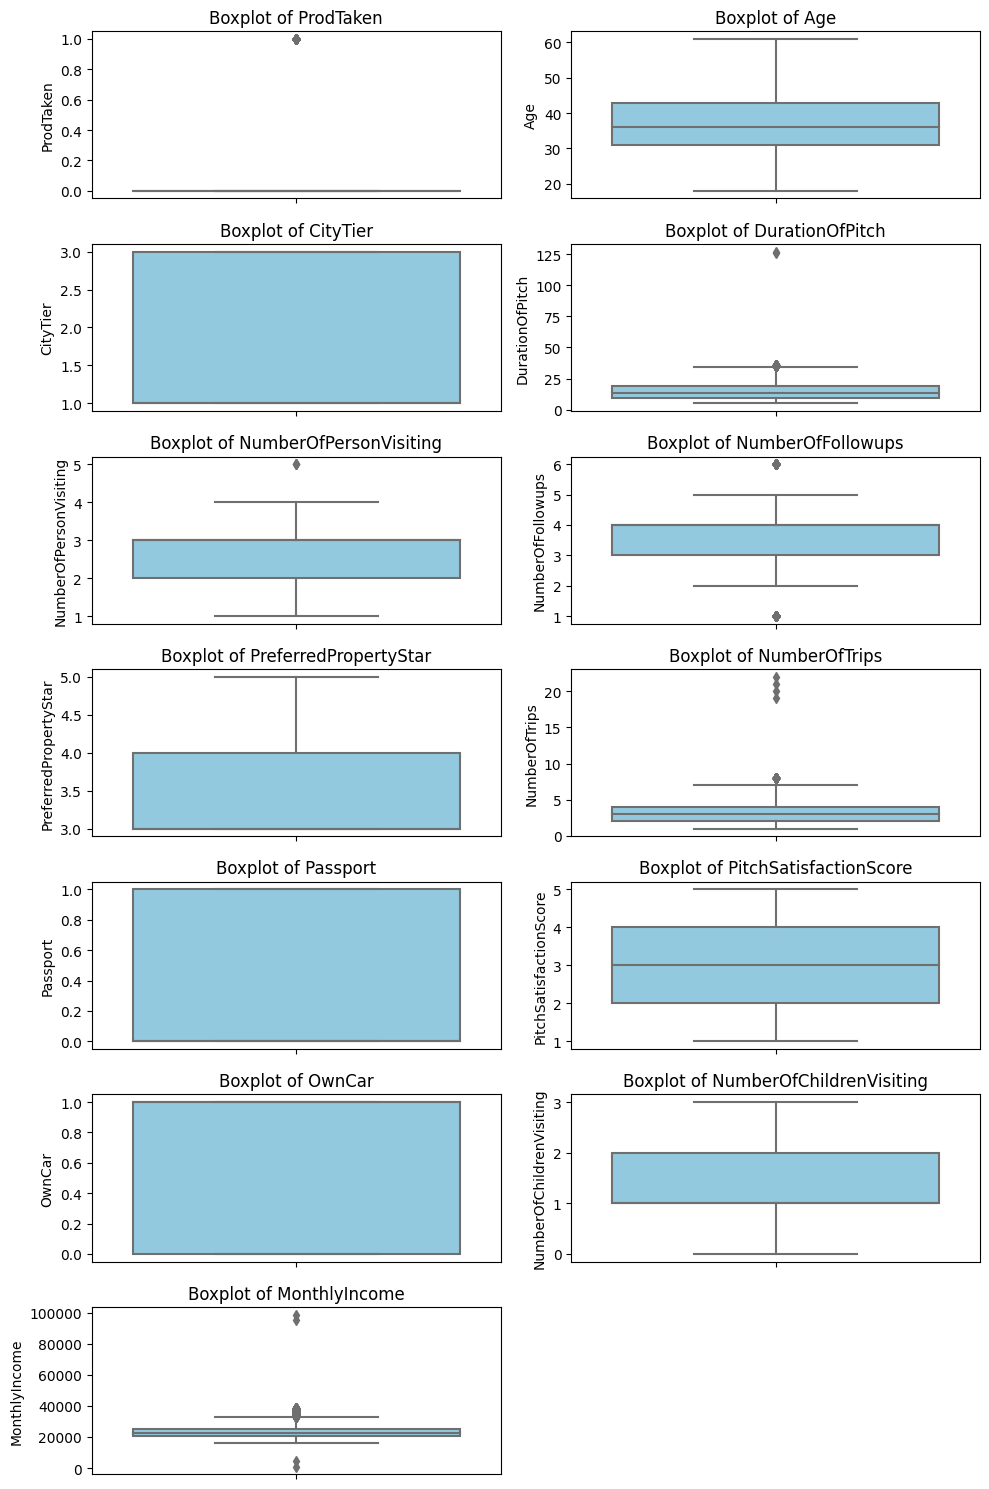

In [ ]:
plot_boxplots_numerical(data)

**DurationOfPitch, NumberOfTrips and MonthlyIncome all have outliers we will examine and treat if necessary.**

**Treating the outliers for Duration of Pitch**

In [ ]:
# Display the longest 5 durations of pitches
data.nlargest(5, 'DurationOfPitch')

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3878,0,53.0,Company Invited,3,127.0,Salaried,Male,3,4.0,Basic,3.0,Married,4.0,0,1,1,2.0,Executive,22160.0
1434,0,36.0,Company Invited,3,126.0,Salaried,Male,2,3.0,Basic,3.0,Married,3.0,0,1,1,1.0,Executive,18482.0
2505,0,39.0,Company Invited,1,36.0,Salaried,Female,3,4.0,Deluxe,3.0,Single,3.0,0,3,1,1.0,Manager,21084.0
2585,0,46.0,Self Enquiry,1,36.0,Small Business,Male,3,4.0,Basic,3.0,Unmarried,7.0,0,2,1,1.0,Executive,22130.0
2643,0,39.0,Self Enquiry,1,36.0,Large Business,Male,3,4.0,Deluxe,3.0,Divorced,5.0,0,2,0,2.0,Manager,24939.0


* Two entries have pitch durations of 127 and 126 minutes respectively. These are significantly longer than the others and are the same entries we identified as potential outliers in the boxplot.
The next longest duration of pitch is 36 minutes.  Since there are only 2 obersvations with these long durations it seems likely they are data entry errors. We will adjust them from the IQR method.

In [ ]:
# Adjust outliers for 'DurationOfPitch' column
adjusted_data = adjust_outliers(data, 'DurationOfPitch')

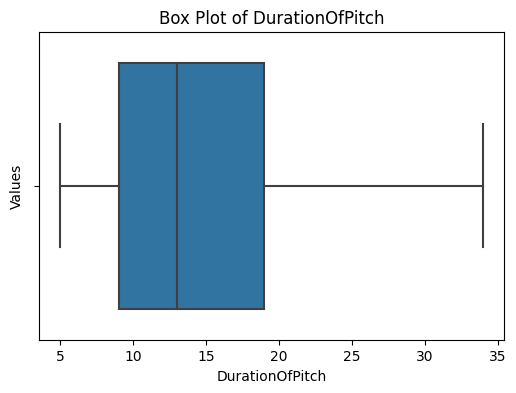

In [ ]:
analyze_outliers(data, 'DurationOfPitch')

**The outliers for DurationOfPitch have been successfully treated.**

In [ ]:
# Explore the outliers for NumberofTrips
# Display the rows with the most trips
data.nlargest(5, 'NumberOfTrips')

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3260,0,40.0,Company Invited,1,16.0,Salaried,Male,4,4.0,Deluxe,4.0,Unmarried,22.0,0,2,1,1.0,Manager,25460.0
816,0,39.0,Company Invited,1,15.0,Salaried,Male,3,3.0,Deluxe,4.0,Unmarried,21.0,0,2,1,0.0,Manager,21782.0
2829,1,31.0,Company Invited,1,11.0,Large Business,Male,3,4.0,Basic,3.0,Single,20.0,1,4,1,2.0,Executive,20963.0
385,1,30.0,Company Invited,1,10.0,Large Business,Male,2,3.0,Basic,3.0,Single,19.0,1,4,1,1.0,Executive,17285.0
2446,1,38.0,Self Enquiry,1,9.0,Free Lancer,Male,4,5.0,Basic,3.0,Single,8.0,1,3,0,1.0,Executive,20768.0


**There are 4 outliers that are causing the NumberOfTrips feature to be skewed.  We will treat this feature using the IQR method.**

In [ ]:
# Adjust outliers for 'NumberofTrips' column
adjusted_data = adjust_outliers(data, 'NumberOfTrips')

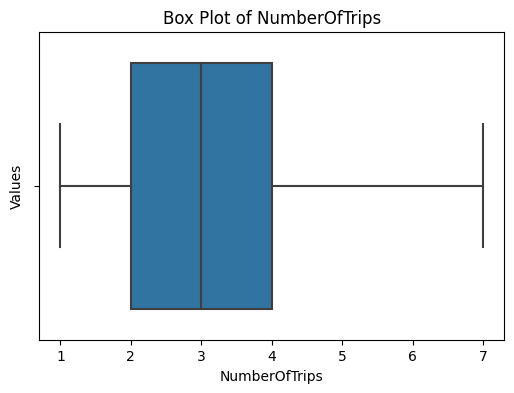

In [ ]:
analyze_outliers(data, 'NumberOfTrips')

**NumberOfTrips outliers' have been successfully treated.**

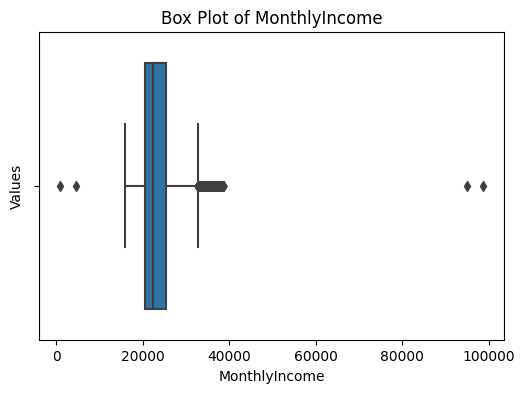

In [ ]:
# We will explore the MonthlyIncome Outliers
analyze_outliers(data, "MonthlyIncome")

In [ ]:
data.nlargest(5, 'MonthlyIncome')

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
2482,0,37.0,Self Enquiry,1,12.0,Salaried,Female,3,5.0,Basic,5.0,Divorced,2.0,1,2,1,1.0,Executive,98678.0
38,0,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,Basic,3.0,Divorced,1.0,1,2,1,0.0,Executive,95000.0
2634,0,53.0,Self Enquiry,1,7.0,Salaried,Male,4,5.0,King,3.0,Divorced,2.0,0,2,1,2.0,VP,38677.0
4104,0,53.0,Self Enquiry,1,7.0,Salaried,Male,4,5.0,King,3.0,Married,2.0,0,1,1,3.0,VP,38677.0
3190,0,42.0,Company Invited,1,14.0,Salaried,Female,3,6.0,King,3.0,Married,3.0,0,4,1,1.0,VP,38651.0


In [ ]:
data.nsmallest(5, 'MonthlyIncome')

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
142,0,38.0,Self Enquiry,1,9.0,Large Business,Female,2,3.0,Deluxe,3.0,Single,4.0,1,5,0,0.0,Manager,1000.0
2586,0,39.0,Self Enquiry,1,10.0,Large Business,Female,3,4.0,Deluxe,3.0,Single,5.0,1,5,0,1.0,Manager,4678.0
513,1,20.0,Self Enquiry,1,16.0,Small Business,Male,2,3.0,Basic,3.0,Single,2.0,1,5,0,0.0,Executive,16009.0
1983,1,20.0,Self Enquiry,1,16.0,Small Business,Male,2,3.0,Basic,3.0,Single,2.0,1,5,1,1.0,Executive,16009.0
727,0,18.0,Company Invited,1,11.0,Salaried,Male,3,3.0,Basic,3.0,Single,2.0,0,2,1,1.0,Executive,16051.0


**The outliers for MonthlyIncome seem legitimate so we will leave them.**

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of the monthly income of customers? Are there any noticeable patterns or outliers in the distribution?
2. Which travel package is pitched the most by the salespersons to the customers?
3. How are the different customer attributes correlated to each other?
4. How does a customer's interest in purchasing the newly introduced travel package vary with their occupation?
5. How does a customer's interest in purchasing the newly introduced travel package vary with their marital status?

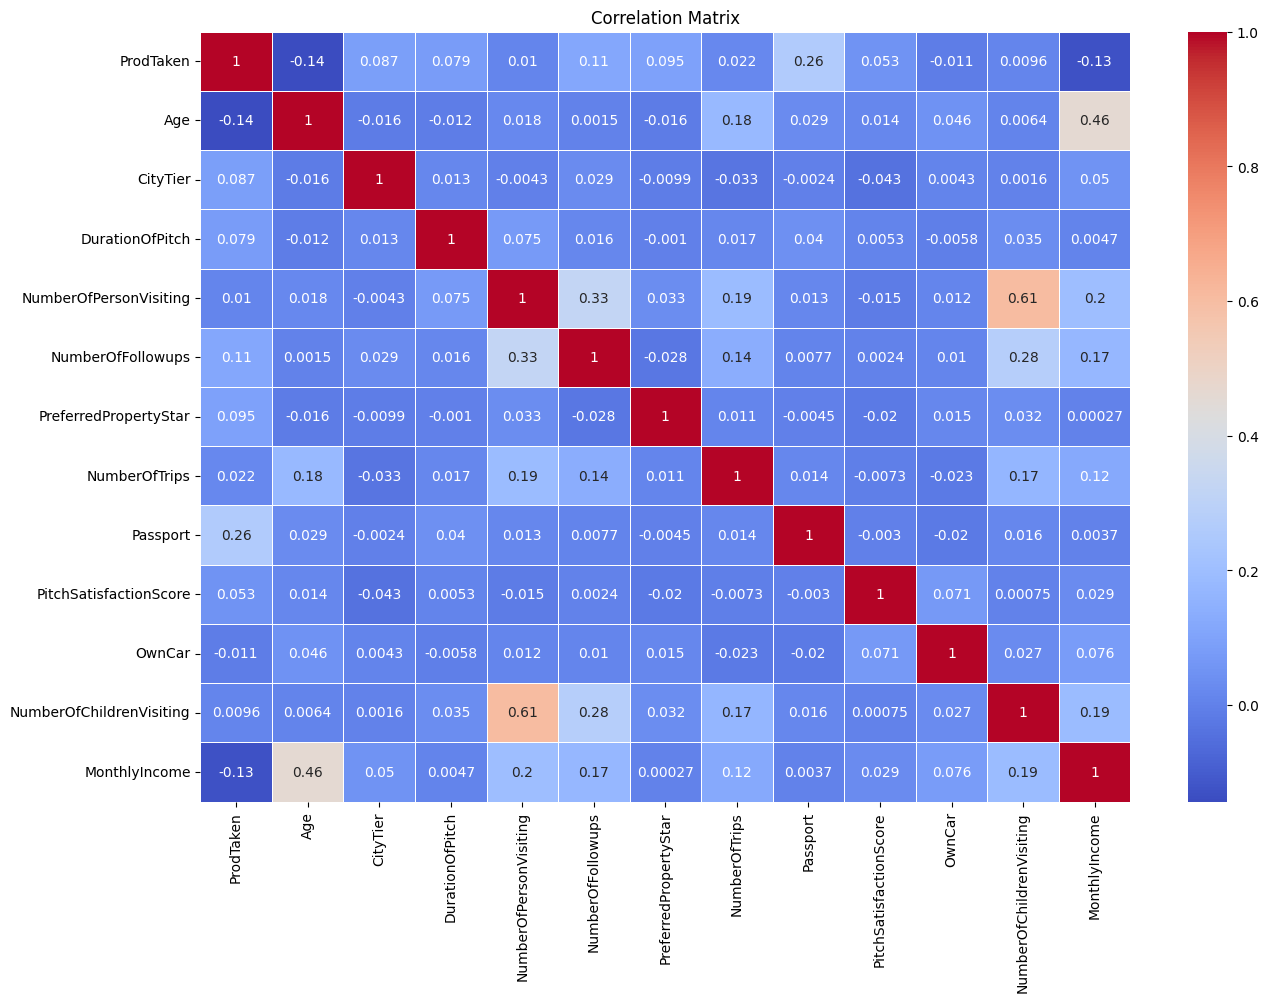

In [ ]:
correlation_matrix = data.corr()

# Visualize the correlation matrix using a heatmap:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**Insights from the Correlation Matrix**:

The <u>ProdTaken</u> variable shares a positive correlation of 0.26 with the possession of a <u>Passport</u>, implying individuals with passports are more inclined to make a purchase. However, there's a twist when it comes to <u>MonthlyIncome</u>. A negative correlation of -0.13 suggests that as income rises, the likelihood of a purchase slightly diminishes.

There's a positive relationship of 0.46 between <u>Age</u> and <u>MonthlyIncome</u>, hinting that older individuals generally have higher incomes. Furthermore, as age increases, the number of trips (<u>NumberOfTrips</u>) taken also seems to rise, with a correlation of 0.18.

Another interesting observation is the strong positive correlation of 0.61 between <u>NumberOfPersonVisiting</u> and <u>NumberOfChildrenVisiting</u>, indicating that when more visitors are present, there's usually a higher number of children among them. Lastly, <u>MonthlyIncome</u> correlates positively with both <u>NumberOfPersonVisiting</u> (0.2) and <u>NumberOfChildrenVisiting</u> (0.19). This suggests that those with higher incomes might often travel accompanied by more people and children.


**Converting the categorical features to category dtype**

In [ ]:
# Convert specified columns to category
columns_to_convert = ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Passport', 'Designation']

data[columns_to_convert] = data[columns_to_convert].astype('category')

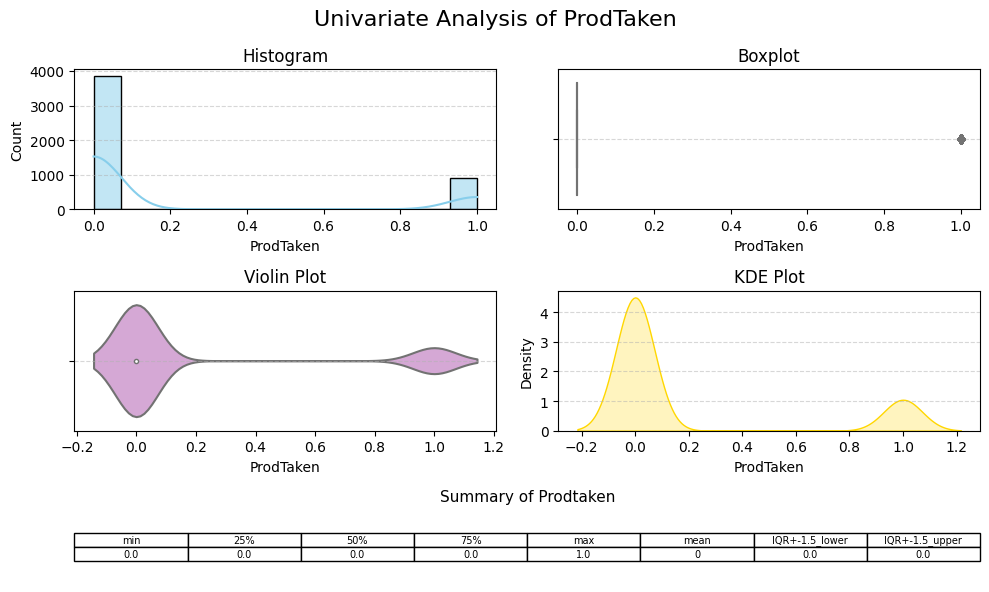

In [ ]:
# Perform visual EDA on all numerica columns
univariate_analysis(data, 'ProdTaken')

**ProdTaken looks as expected as a binary response.  There is roughly a 4-1 ratio between 0 and 1.**

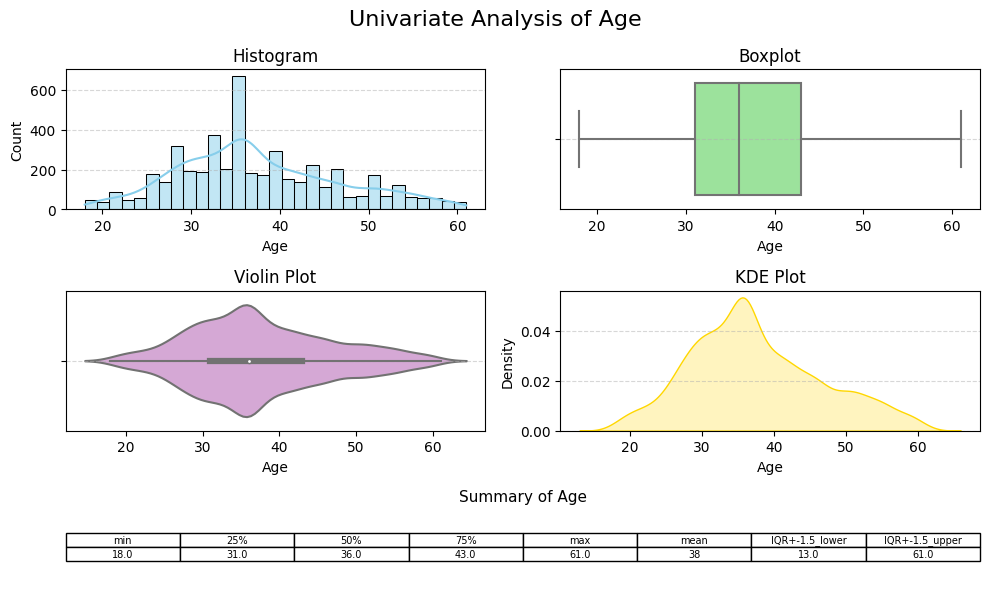

In [ ]:
univariate_analysis(data, 'Age')

**Observations on Age**
* Age is evenly distributed.
* Age has no outliers.
* Median age is 36. Min is 18, Max is 61.

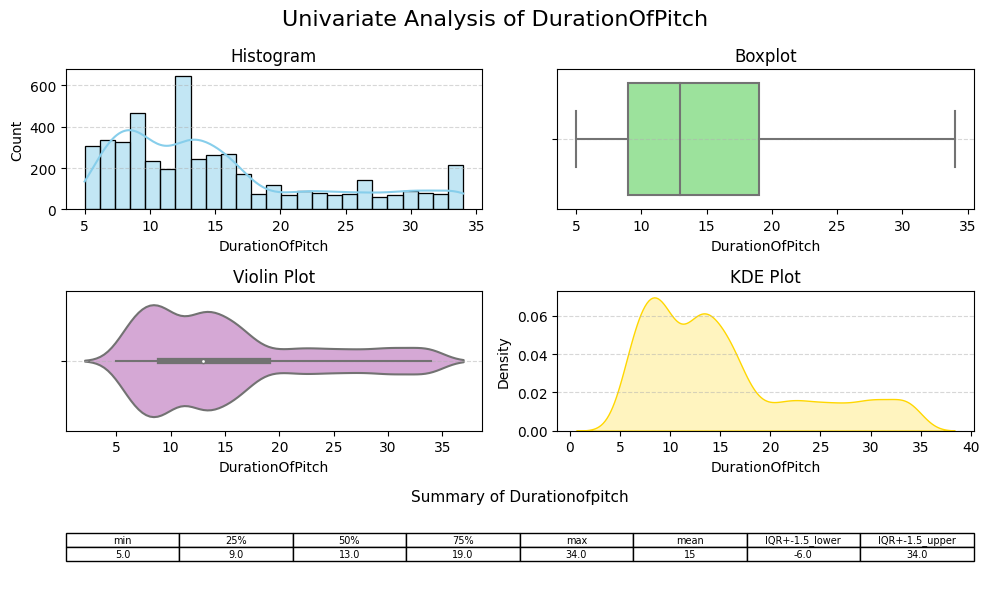

In [ ]:
univariate_analysis(data, 'DurationOfPitch')

**Observations on DurationOfPitch (DoP)**
* DoP is right skewed.
* Min is 5 minutes, Max is 127 minutes. Median is 13 minutes.  

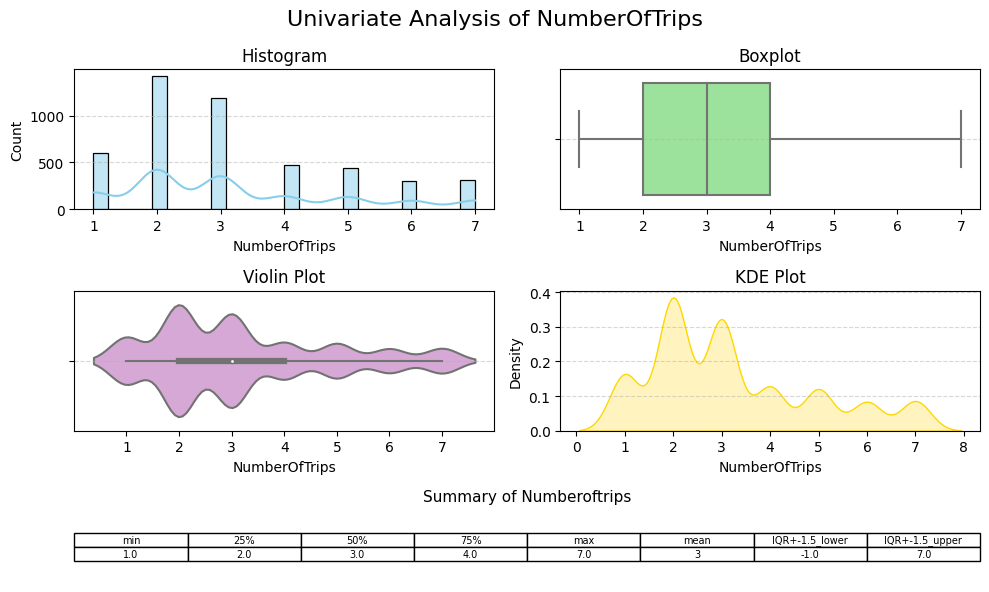

In [ ]:
univariate_analysis(data, 'NumberOfTrips')

* NumberOfTrips is slightly right skewed.
* Min is 1 Max is 7.
* Mean is 3.

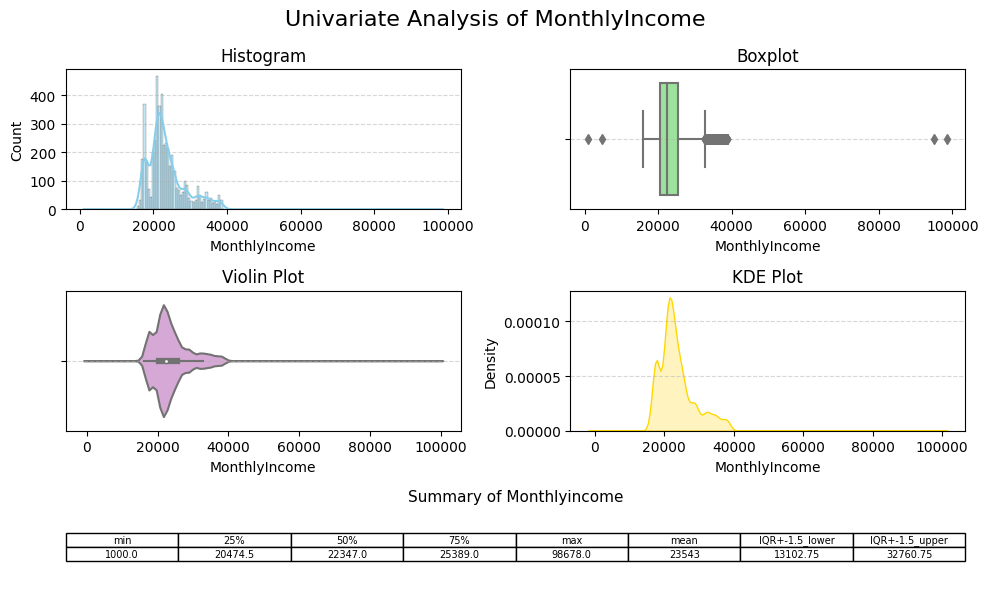

In [ ]:
univariate_analysis(data, 'MonthlyIncome')

* Monthly income is right skewed.
* The data is clustered mainly between 18k and 40k.
* The outliers were determined to be most likey legitimate.

In [ ]:
# Correcting an error in the Gender data where Female was input as 'Fe Male' in some instances
data['Gender'] = data['Gender'].replace('Fe Male', 'Female')

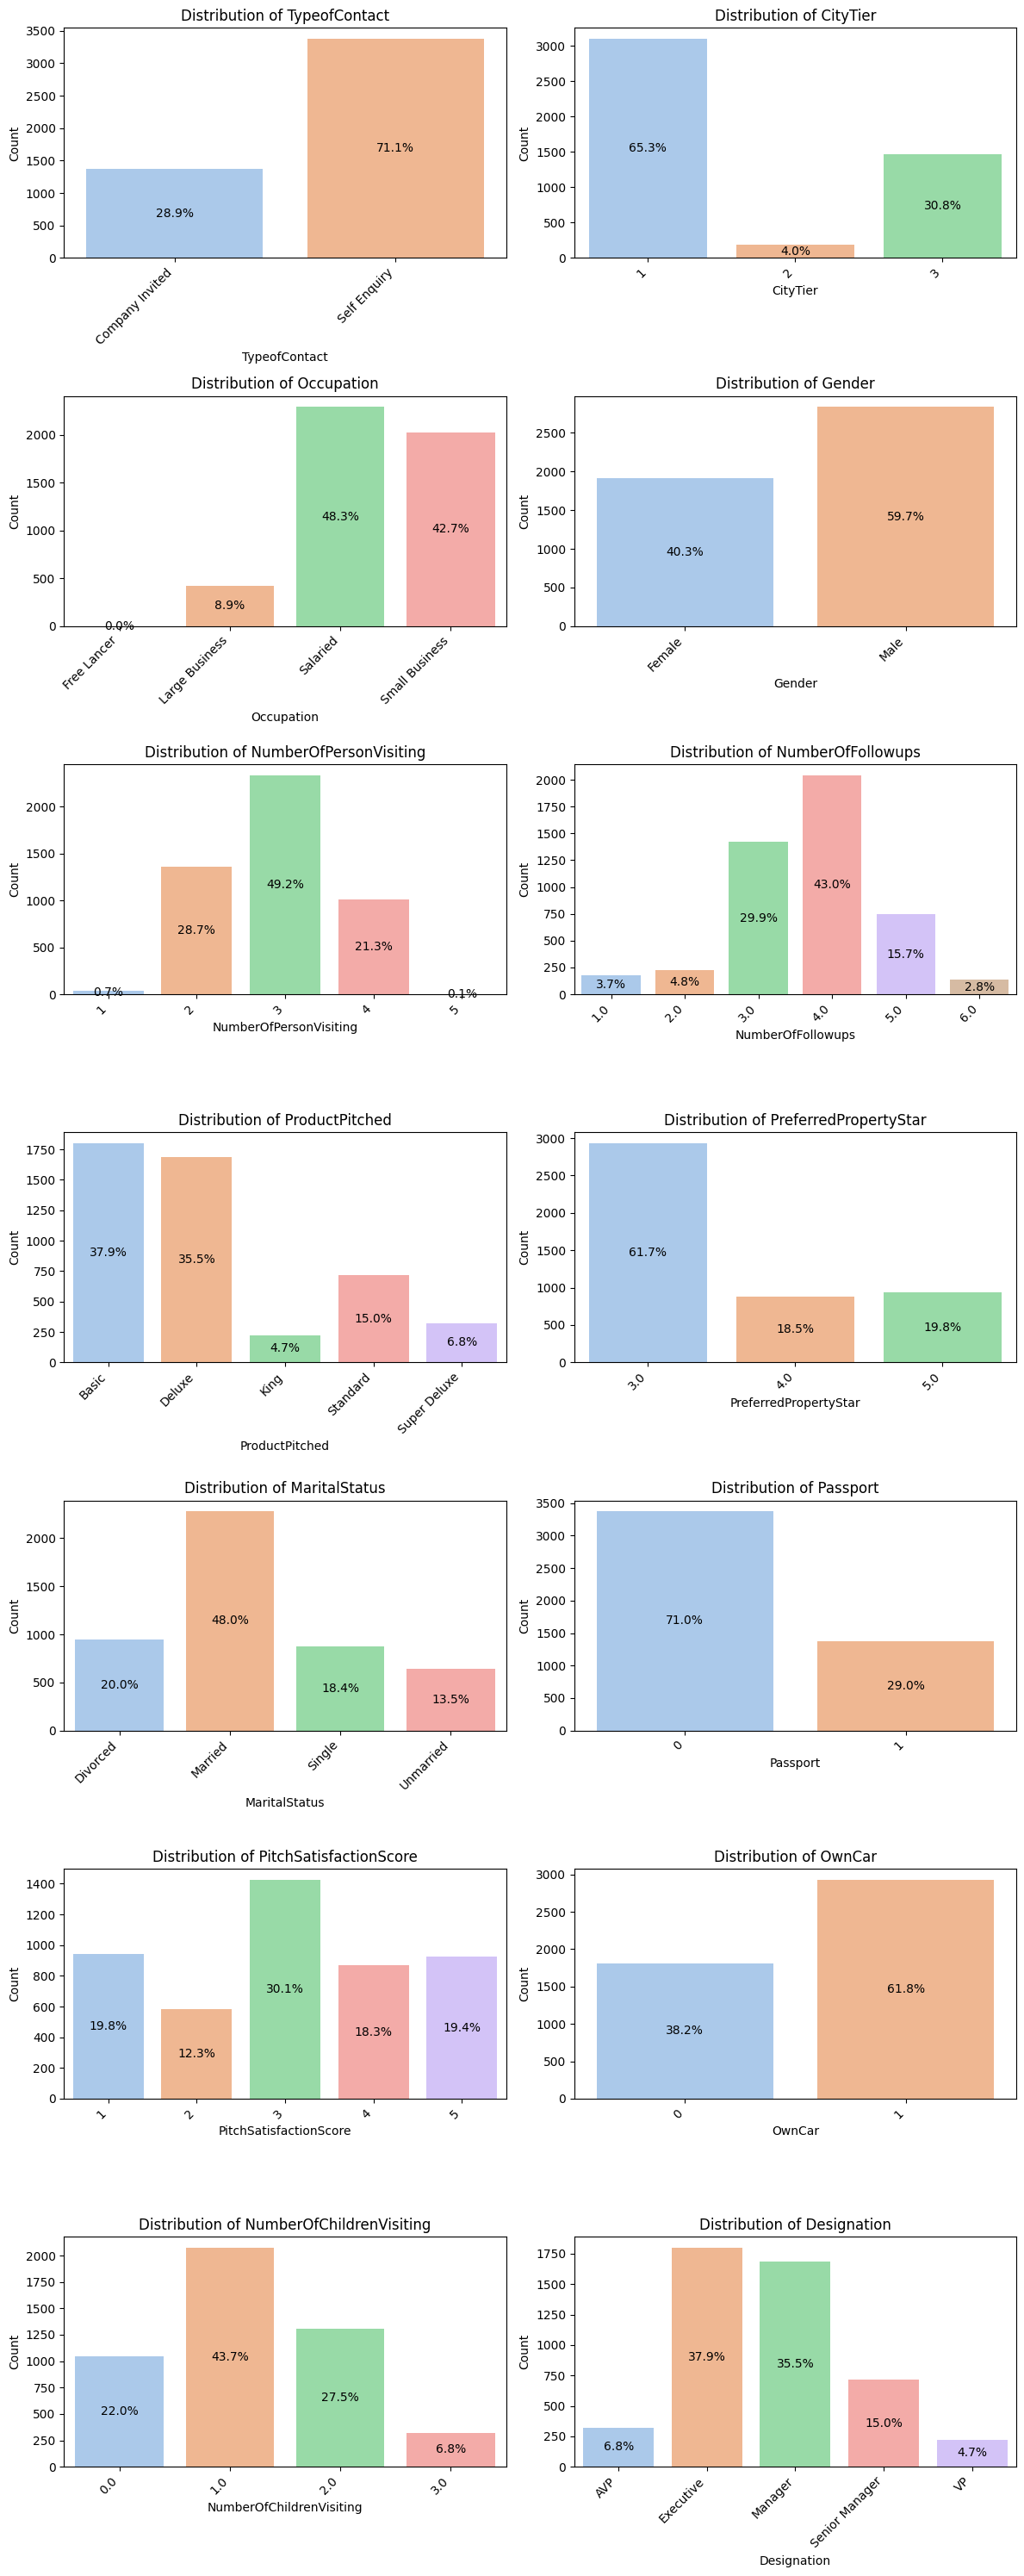

In [ ]:
cat_feature_list = ['TypeofContact', 'CityTier', 'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'ProductPitched',
                      'PreferredPropertyStar', 'MaritalStatus', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'Designation']
plot_features(data, cat_feature_list, figsize=(12, 30))

**Observations of categorical features**
* TypeOfContact is 71% Self Inquiry and 29% Company Invited
* CityTier is made up of 61% as Tier 1, 4% as Tier 2, and 31% as Tier 3.
* Customer Occupations: 48% Salaried, 43% Small Business, 9% Large Business
* Males make up 60% of customers, females 40%
* 99% of customers take between 2 - 5 on a trip.
* The distribution indicates that most of the salespeople follow up either 3 or 4 times with potential customers.
* The most common products were the Basic and Deluxe comprising 73% of pitches.
* Customers preferred 3 star properites 62% of the time, 4 & 5 star properties about 40% of the time.
* Married customers make up 48% of the base, divorced 20%, single 18% adnd unmarried 14%
* 29% of customers have a passport, 71% do not.
* Pitch satisfaction score is fairly distibuted with 30% giving a rating of 3.
* 62% of customers own a car, 38% do not.
* Most customers (78%) plan on bringing kids on the trip.
* Executives and Managers make up the majority (88%) of the customer base.  VP's make up 12%.

##Bi-variate Analysis

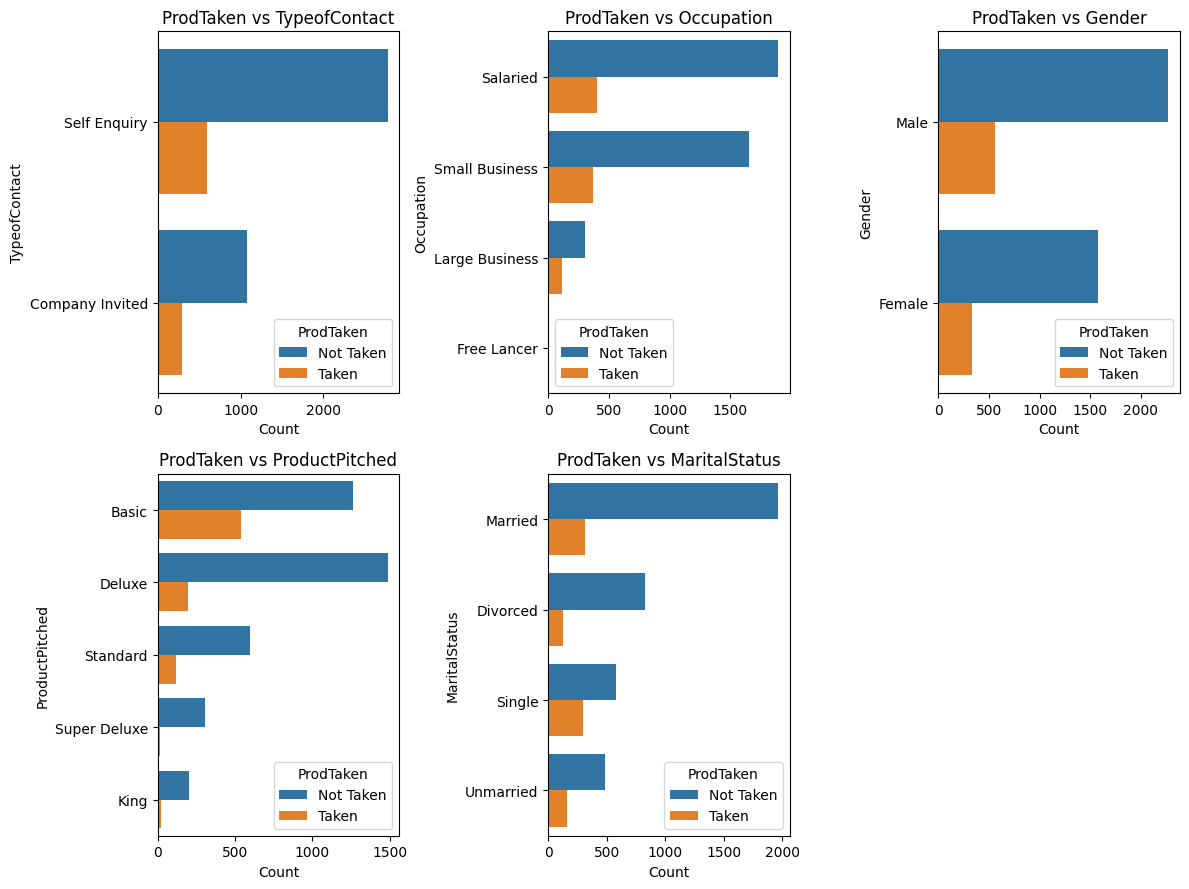

In [ ]:
# Displaying plots for visualizing ProdTaken vs features
plt.figure(figsize=(12, 9))

# List of columns for bivariate analysis with ProdTaken
bivariate_cols = ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus']

# Plotting the relationship between ProdTaken and other categorical columns
for i, col in enumerate(bivariate_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(y=data[col], hue=data['ProdTaken'], order=data[col].value_counts().index)
    plt.title(f'ProdTaken vs {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.legend(title='ProdTaken', labels=['Not Taken', 'Taken'])

plt.tight_layout()
plt.show()

**Observations of biavariate analysis:**

1. **TypeofContact vs. ProdTaken:** Customers who came through "Self Enquiry" have a higher proportion of taking a product compared to those who were "Company Invited"

2. **Occupation vs. ProdTaken:** "Salaried" individuals and "Small Business" owners have a higher proportion of not taking the product, whereas "Large Business" owners and "Free Lancers" show a relatively balanced distribution between taking and not taking the product

3. **Gender vs. ProdTaken:** Both male and female customers show a similar pattern: more customers did not take the product compared to those who did. However, the difference in proportions is not very significant based on gender

4. **ProductPitched vs. ProdTaken:** The "Basic" package seems to have a higher conversion rate as many customers took this product. The "Deluxe" package, despite being pitched more frequently than others (except "Basic"), has a lower conversion rate. "Super Deluxe", "King", and "Standard" have relatively lower pitches and conversions

5. **MaritalStatus vs. ProdTaken:** "Married" individuals have a higher proportion of not taking the product, whereas "Single" and "Divorced" individuals show a relatively balanced distribution. The "Unmarried" category has very few data points, so it's hard to draw a definitive conclusion for this group

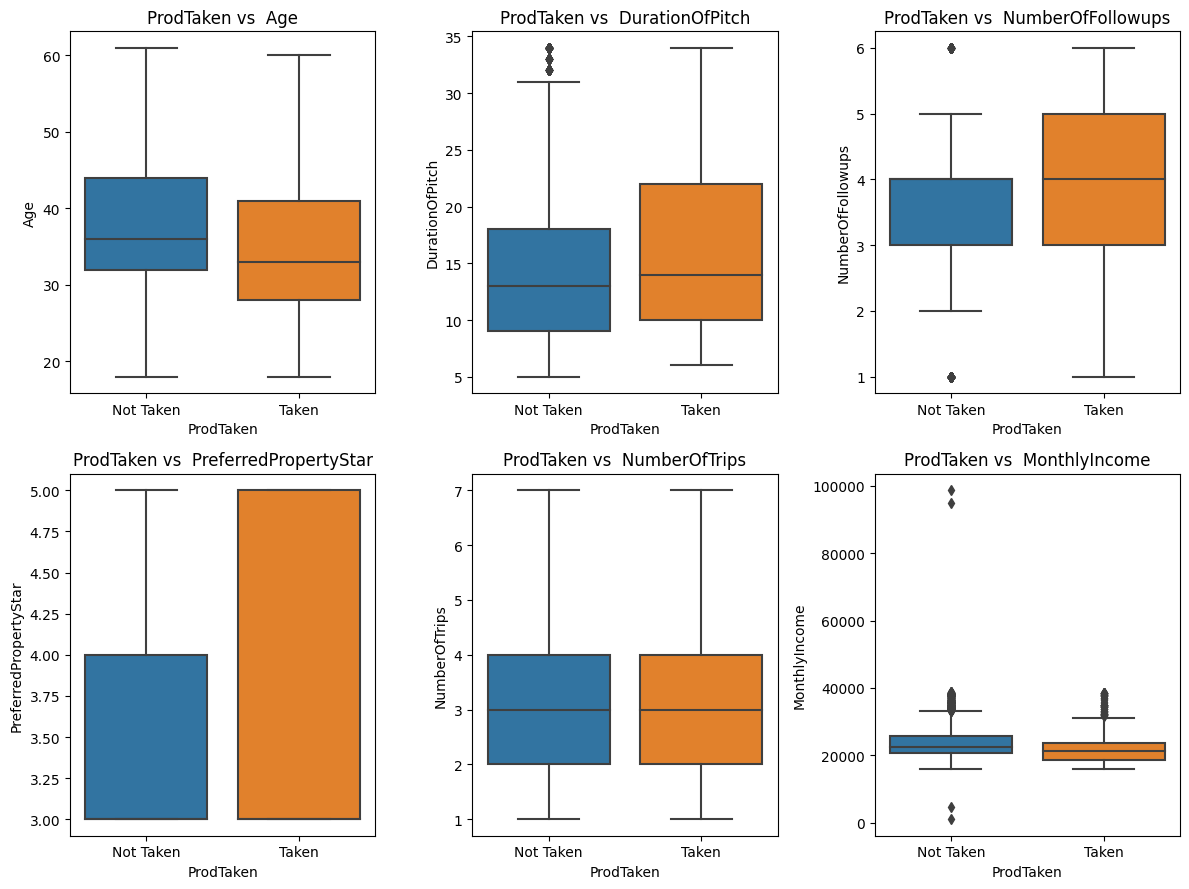

In [ ]:
# Bivariate analysis with ProdTaken vs numerical features
bivariate_num_cols = ['Age', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'MonthlyIncome']

# Setting plot size
plt.figure(figsize=(12, 9))

# Plotting the relationship between ProdTaken and numerical columns
for i, col in enumerate(bivariate_num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=data['ProdTaken'], y=data[col])
    plt.title(f'ProdTaken vs  {col}')
    plt.xlabel('ProdTaken')
    plt.ylabel(col)
    plt.xticks([0, 1], ['Not Taken', 'Taken'])

plt.tight_layout()
plt.show()

**Observations of Targe variable (ProdTaken) vs other features:**

1. **Age vs. ProdTaken:** The median age of customers who took a product is slightly lower than those who did not. This suggests that slightly younger customers might be more inclined to purchase a product.

2. **DurationOfPitch vs. ProdTaken:** The median pitch duration for customers who took a product is slightly longer than for those who did not.

3. **NumberOfFollowups vs. ProdTaken:** The median number of follow-ups is slightly higher for customers who did not take a product. This indicates that salespeople might be making more follow-up attempts with customers who are less inclined to purchase.

4. **PreferredPropertyStar vs. ProdTaken:** The preferred property star rating does not show significant differences between the two categories. However, it appears that customers who prefer 5-star properties are slightly more inclined to purchase a product.

5. **NumberOfTrips vs. ProdTaken:** Customers who took a product tend to have a wider range of trips per year, with both lower and higher numbers of trips compared to those who did not take a product.

6. **MonthlyIncome vs. ProdTaken:** The income distribution is relatively similar for both categories. However, there's a slight indication that customers with higher incomes might be more inclined to purchase a product, as seen from the upper quartile of the boxplot.

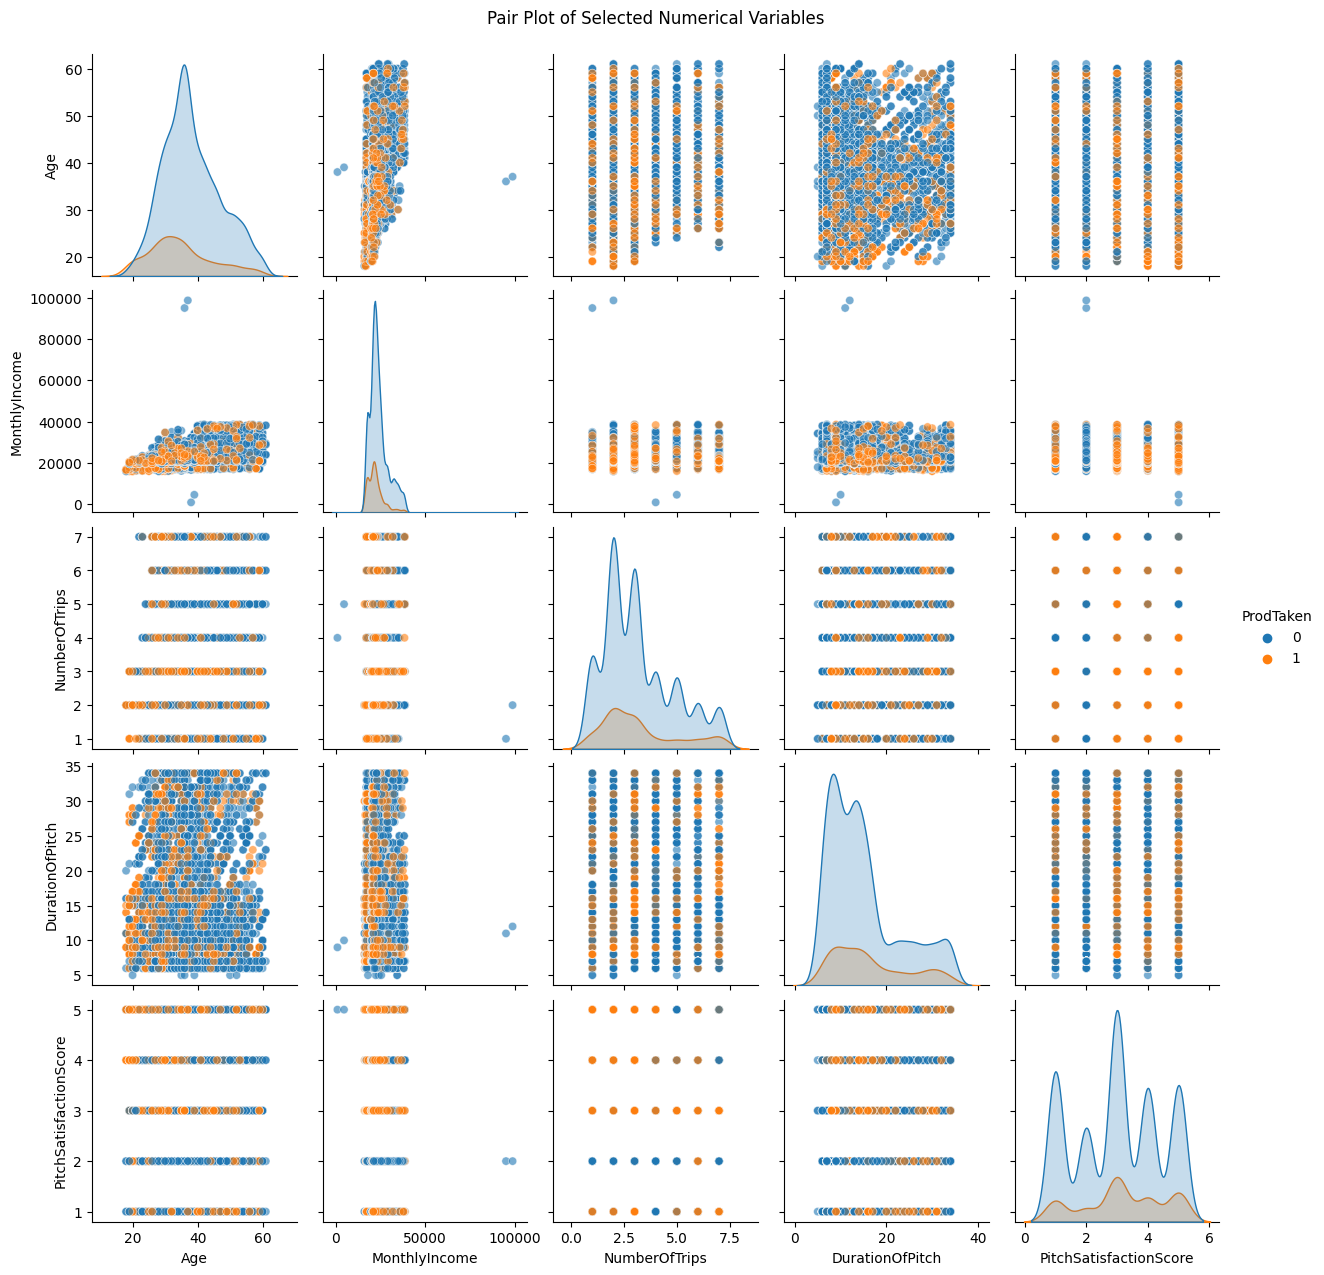

In [ ]:
# Selecting a subset of relevant numerical variables for the pair plot
selected_columns = ['Age', 'MonthlyIncome', 'NumberOfTrips', 'DurationOfPitch', 'PitchSatisfactionScore', 'ProdTaken']
sns.pairplot(data[selected_columns], hue='ProdTaken', diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot of Selected Numerical Variables', y=1.02)
plt.show()

**Observations**
1. **Age vs. MonthlyIncome:** There's a broad distribution, with no clear linear relationship between age and monthly income. However, we see a slight concentration of higher incomes in the mid-age range.

2. **NumberOfTrips:** Most customers seem to take between 1 and 3 trips annually. We also observe that customers who have taken the package (denoted in orange) tend to be spread across all ranges of the number of trips.

3. **DurationOfPitch:** The majority of pitches last less than 20 minutes. Interestingly, there's no clear distinction in the duration of pitch between those who have and haven't purchased a package.

4. **PitchSatisfactionScore:** The distribution of satisfaction scores is fairly even across different age groups and income levels. However, we see that even customers with higher satisfaction scores can choose not to purchase a package.

5. **ProdTaken:** The hue differentiates between those who have taken the package (1) and those who haven't (0). This allows us to visualize patterns in the decision to purchase relative to the other variables.

##Determine the customer profile based upon Packages Type (Basic, Standard, Deluxe, Super Deluxe, and King)

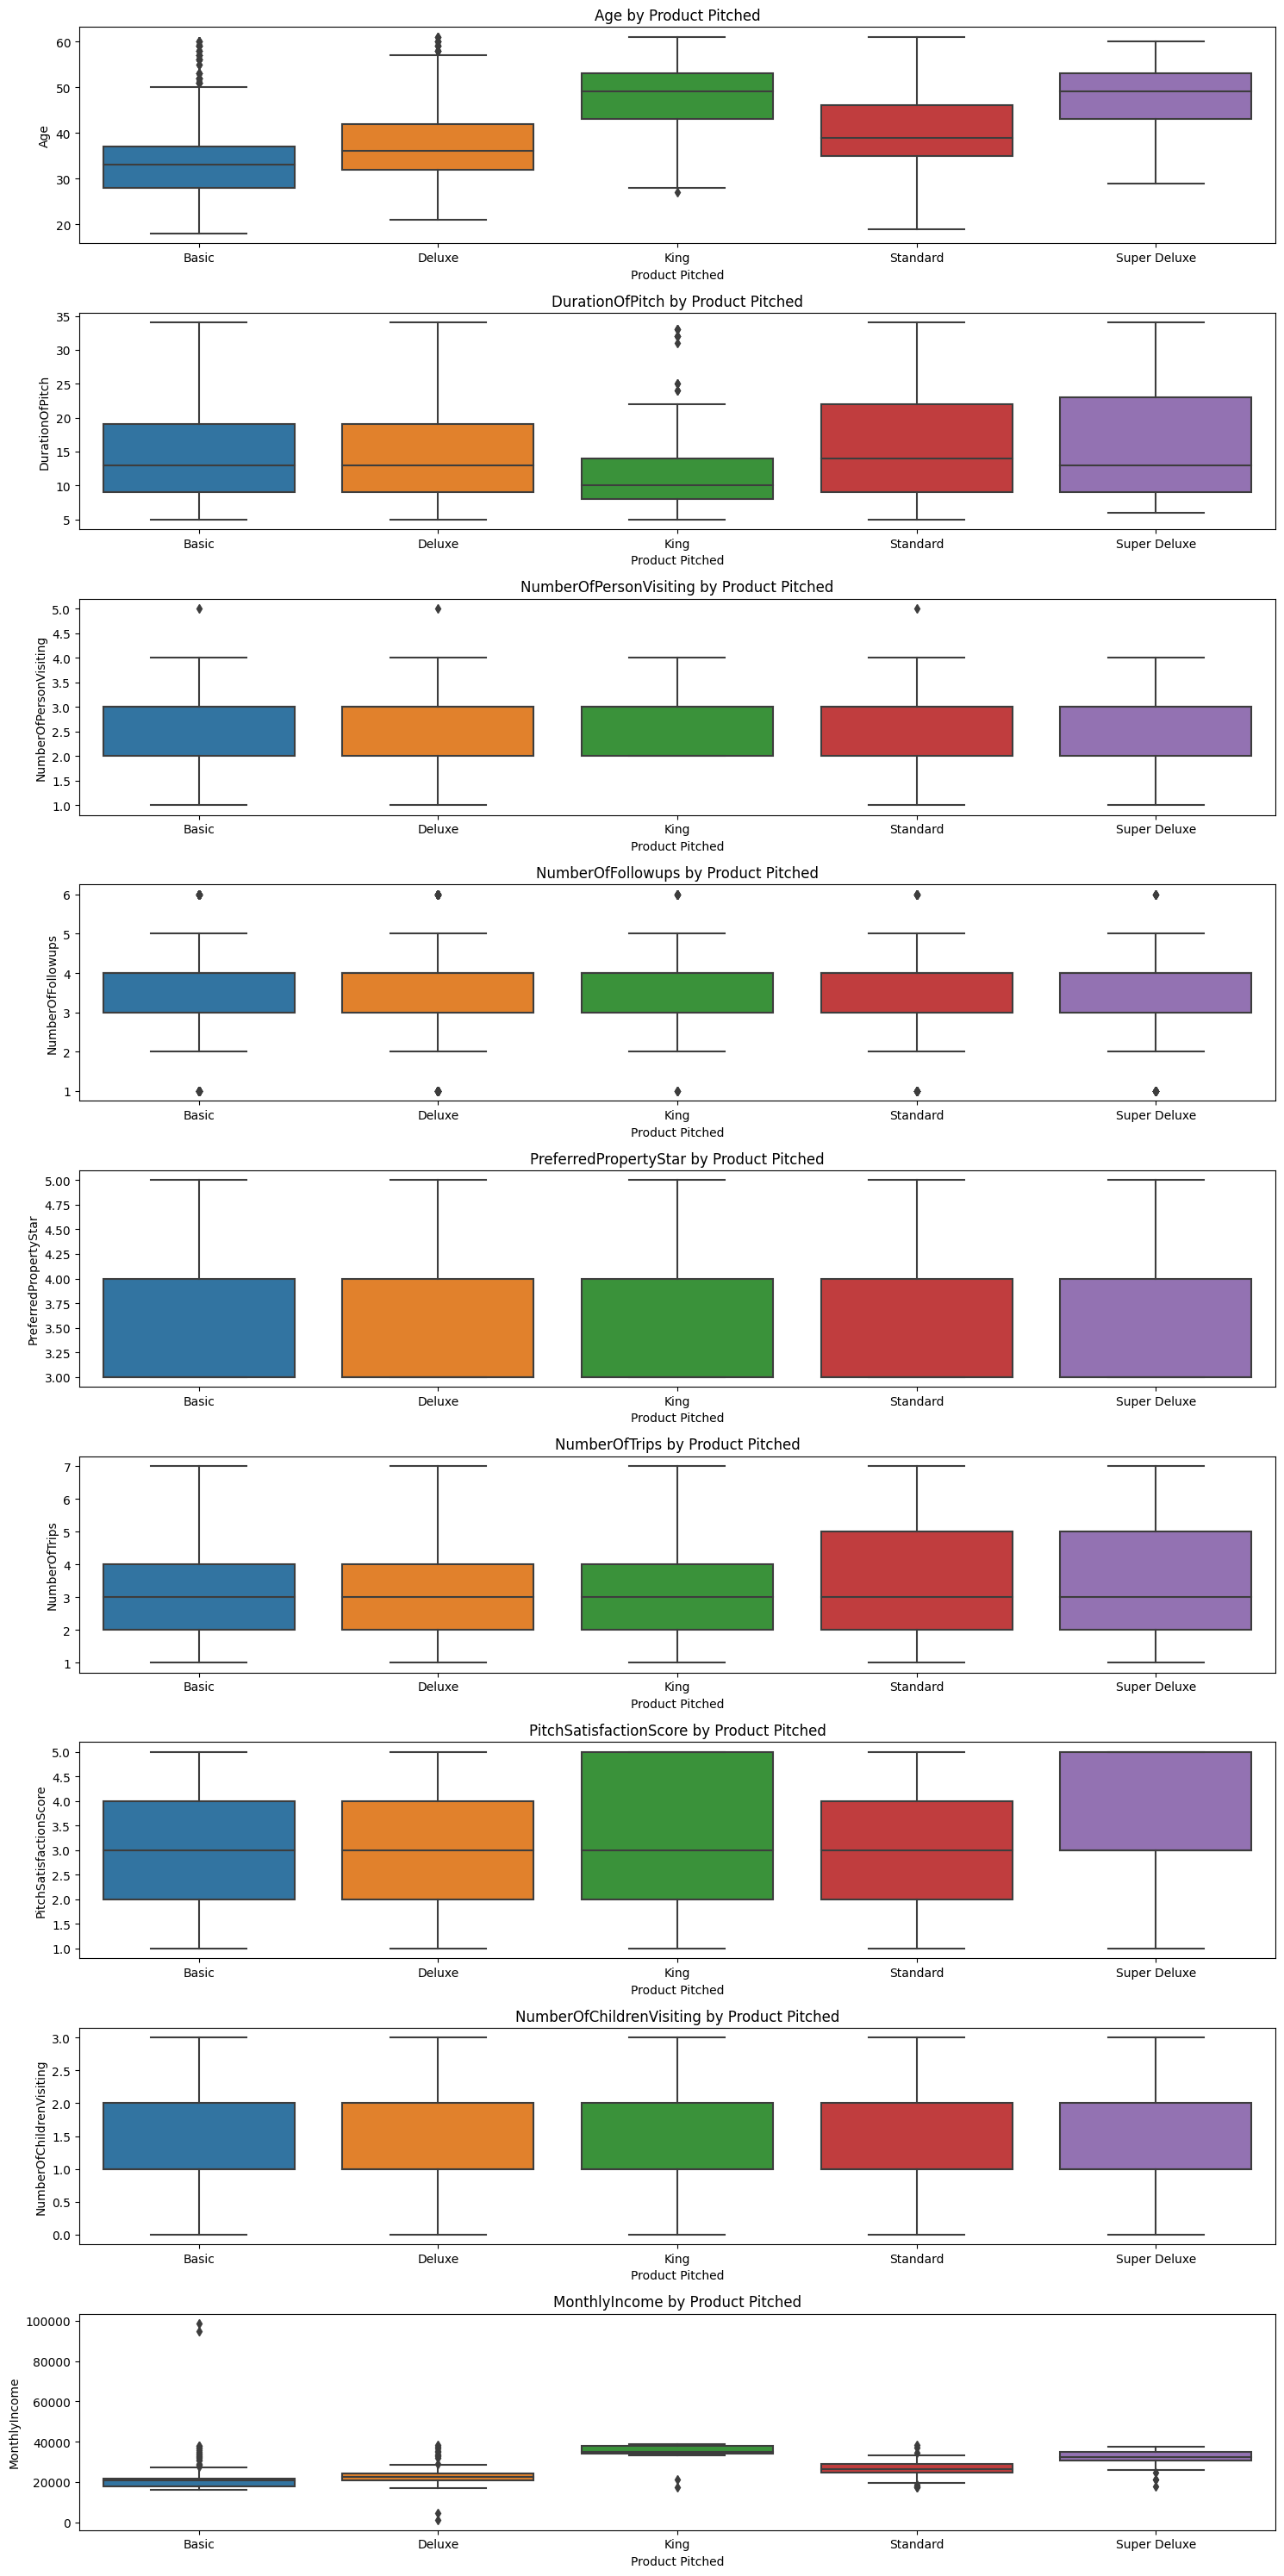

In [ ]:
# Comparing Packages (ProductPitched) to the numerical features
numerical_features = [
    "Age", "DurationOfPitch", "NumberOfPersonVisiting",
    "NumberOfFollowups", "PreferredPropertyStar", "NumberOfTrips",
    "PitchSatisfactionScore", "NumberOfChildrenVisiting", "MonthlyIncome"
]

# Setting up the figure and axes
fig, axes = plt.subplots(nrows=len(numerical_features), figsize=(15, 30))

# Plotting box plots for each numerical feature
for i, feature in enumerate(numerical_features):
    sns.boxplot(x="ProductPitched", y=feature, data=data, ax=axes[i])
    axes[i].set_title(f'{feature} by Product Pitched')
    axes[i].set_ylabel(feature)
    axes[i].set_xlabel('Product Pitched')

plt.tight_layout()
plt.show()

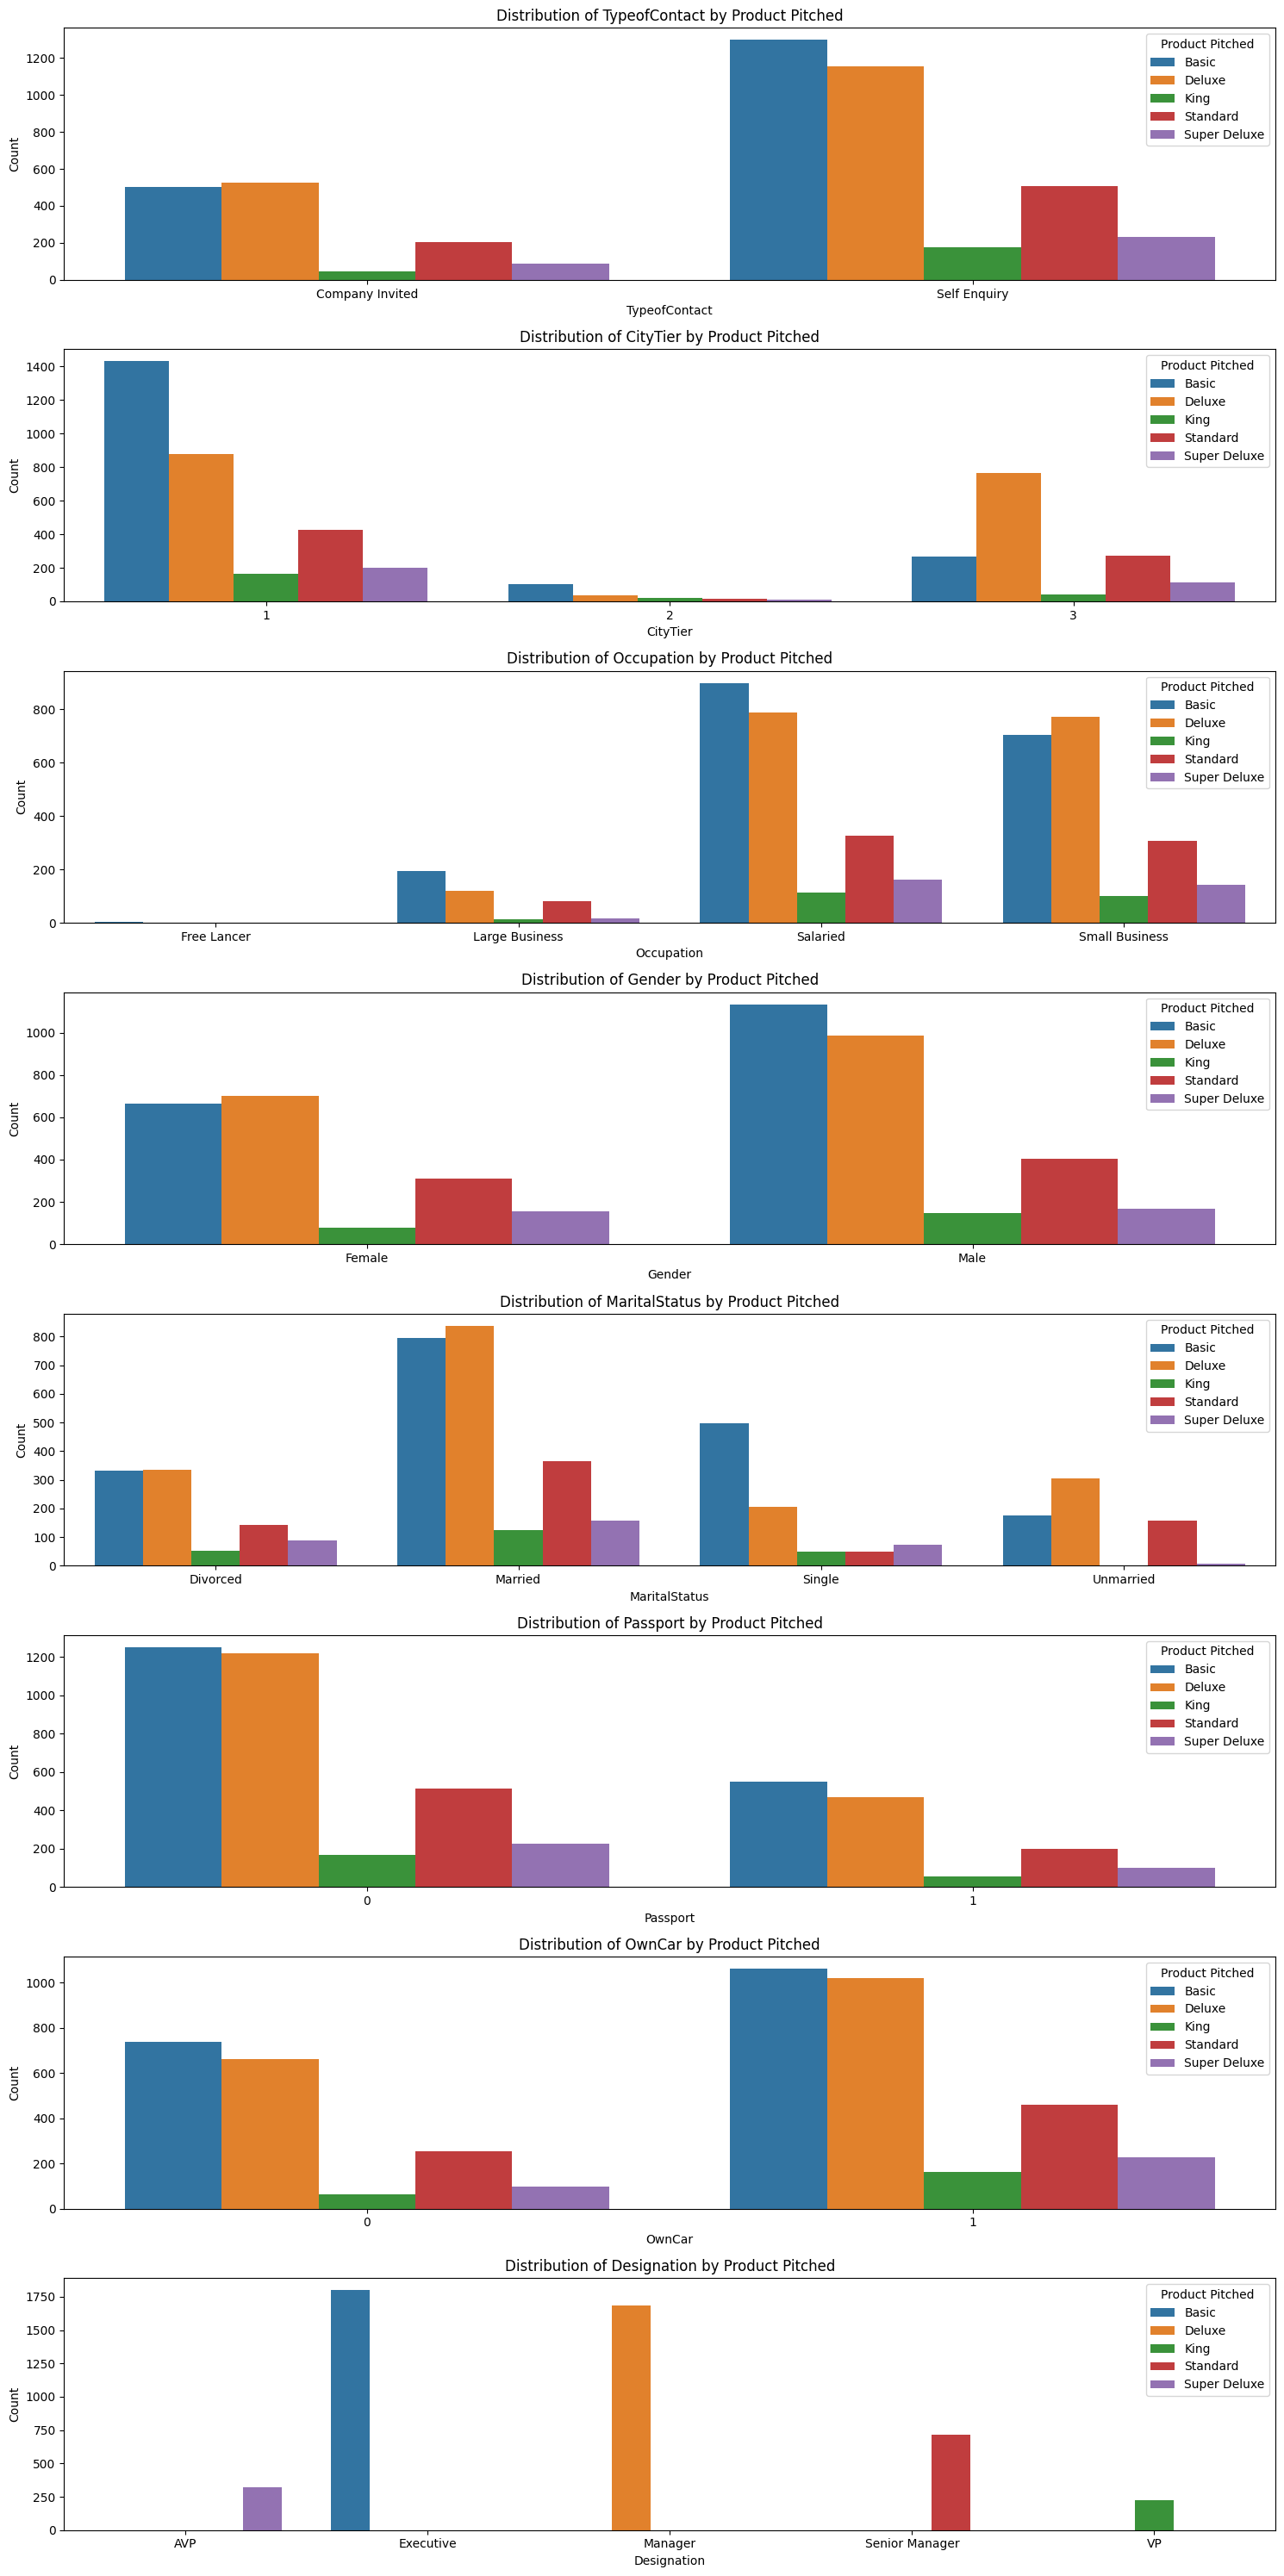

In [ ]:
# Comparing Packages (ProductPitched) to the categorial features
categorical_features = [
    "TypeofContact", "CityTier", "Occupation", "Gender",
    "MaritalStatus", "Passport", "OwnCar", "Designation"
]

# Setting up the figure and axes
fig, axes = plt.subplots(nrows=len(categorical_features), figsize=(15, 30))

# Plotting bar plots for each categorical feature
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, hue="ProductPitched", data=data, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} by Product Pitched')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(feature)
    axes[i].legend(title='Product Pitched')

plt.tight_layout()
plt.show()

**Customer Profile based upon the different packages:**

Customers who opt for the **Basic Package** are usually younger with a lower monthly income. They are mainly salaried individuals or own small businesses. The package is typically pitched to executives, and it's interesting to note that a significant portion of these customers come through self-enquiry. They primarily hail from City Tier 1 and are less likely to possess a passport.

The **Deluxe Package** appeals to a demographic that's young to middle-aged. These individuals have a moderate monthly income and similar to the Basic Package, are majorly salaried or small business owners. This package is also mostly pitched to executives. A majority of these customers come from City Tier 1, and when it comes to passports, they fare better than the Basic Package customers but not as well as those opting for the 'Super Deluxe' or 'King' packages.

Customers choosing the **Standard Package** present a varied age profile, though many are middle-aged. Their income ranges from moderate to high. This package attracts a diverse range of occupations and is often pitched to managers. While most customers are from City Tier 1, there's a considerable representation from other tiers as well. Interestingly, many customers in this group don't have a passport.

The **Super Deluxe Package** is preferred by older customers with a higher monthly income. Their occupational backgrounds are varied, but there's a balance among them. More managers opt for this package compared to executives. Notably, many customers of this package are directly invited by the company, predominantly belong to City Tier 1, and are more likely to have a passport. They also tend to travel more frequently.

Lastly, the **King Package** is chosen by older clientele who enjoy a higher, albeit varied, monthly income. Occupationally diverse, more managers lean towards this package. These customers are often approached by the company for this premium package. They predominantly come from City Tier 1, have a high likelihood of possessing a passport, and tend to travel more. Their preference leans towards higher-end accommodations, specifically 4-star and 5-star properties.


##Prepare for model building

In [ ]:
# Encoding the necessary features
# Initializing the encoders
onehot_encoder = OneHotEncoder(drop='first', sparse=False)
label_encoder = LabelEncoder()

# Binary Encoding for TypeofContact and Gender
data['TypeofContact'] = label_encoder.fit_transform(data['TypeofContact'].astype(str))
data['Gender'] = label_encoder.fit_transform(data['Gender'].astype(str))

# One-hot Encoding for CityTier, Occupation, ProductPitched, MaritalStatus, and Designation
onehot_features = ['CityTier', 'Occupation', 'ProductPitched', 'MaritalStatus', 'Designation']
encoded_data = onehot_encoder.fit_transform(data[onehot_features])
encoded_df = pd.DataFrame(encoded_data, columns=onehot_encoder.get_feature_names_out(onehot_features))

# Resetting the index of 'data' to ensure alignment
data.reset_index(drop=True, inplace=True)

# Combining the encoded features with the original dataset into a df named tourism_encoded
tourism_encoded = pd.concat([data, encoded_df], axis=1)
tourism_encoded.drop(onehot_features, axis=1, inplace=True)

# Displaying the first 5 rows of the encoded dataset
tourism_encoded.head()

,ProdTaken,Age,TypeofContact,DurationOfPitch,Gender,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,...,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,1,41.0,1,6.0,0,3,3.0,3.0,1.0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0,49.0,0,14.0,1,3,4.0,4.0,2.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,37.0,1,8.0,1,3,4.0,3.0,7.0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0,33.0,0,9.0,0,2,3.0,3.0,2.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,36.0,1,8.0,1,2,3.0,4.0,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Model Building - (Classifers -> Bagging, Random Forest, and Decision Tree)

In [ ]:
# Splitting the data into training and testing sets
X = tourism_encoded.drop('ProdTaken', axis=1)
y = tourism_encoded['ProdTaken']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Function to Train, Predict and Evaluate a set of models. The return value is a df containing the models' metrics.

def evaluate_models(models, X_train, y_train, X_test, y_test):
    """
    Trains, predicts and evaluates given models.

    Args:
    - models (dict): A dictionary with model names as keys and model instances as values.
    - X_train, y_train, X_test, y_test (pd.DataFrame or np.array): Train and test data.

    Returns:
    - pd.DataFrame: A dataframe with model names and their respective metrics.
    """
    results = []

    for name, model in models.items():
        # Train
        model.fit(X_train, y_train)

        # Predict
        preds = model.predict(X_test)

        # Evaluate
        accuracy = accuracy_score(y_test, preds)
        f1 = f1_score(y_test, preds)
        precision = precision_score(y_test, preds)
        recall = recall_score(y_test, preds)
        auc = roc_auc_score(y_test, preds) if len(set(y_test)) == 2 else float('nan')  # Calculate AUC only for binary classification

        results.append({
            'Model': name,
            'Accuracy': accuracy,
            'F1-Score': f1,
            'Precision': precision,
            'Recall': recall,
        })

    return pd.DataFrame(results)


In [ ]:
# Setting the bagging models up to pass them to the evaluate_models function.
bagging_models= {
    'Decision Tree 1': DecisionTreeClassifier(random_state=42),
    'Bagging 1': BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42), n_estimators=50, random_state=42),
    'Random Forest 1': RandomForestClassifier(n_estimators=100, random_state=42)
}

df_bagging_models = evaluate_models(bagging_models, X_train, y_train, X_test, y_test)
print(df_bagging_models)


             Model  Accuracy  F1-Score  Precision    Recall
0  Decision Tree 1  0.890526  0.720430   0.701571  0.740331
1        Bagging 1  0.935789  0.811146   0.922535  0.723757
2  Random Forest 1  0.921053  0.750831   0.941667  0.624309


**Model Performance Analysis & Comments - Decision Tree, Bagging and Random Forest:**

The three models show varying degrees of performance across different metrics. The **Decision Tree 1** model has an accuracy of 89.05%, with a fairly balanced precision and recall, leading to an F1-score of 72.04%. This suggests that the model has a good overall performance, but there's room for improvement, especially in differentiating between the true positive and false positive classifications.

The **Bagging 1** model outperforms the Decision Tree in accuracy, achieving a  93.58% accuracy score. Its precision is notably high at 92.25%, indicating that when it predicts a positive class, it's very likely to be correct. However, its recall, at 72.38%, is a bit lower than its precision, hinting that there are still a significant number of positive instances it fails to catch. The balanced F1-score is 81.11%, showing the harmony between precision and recall.

Lastly, the **Random Forest 1** model offers an accuracy of 92.11%, slightly below the Bagging model but still very high. Its precision is exceptionally high at 94.17%, suggesting that its positive predictions are highly trustworthy. Yet, its recall is only 62.43%, which is the lowest among the three models. This indicates that while the predictions it makes are accurate, it misses a considerable chunk of positive instances. The F1-score is 75.08%, reflecting this disparity between precision and recall.

In summary, while all three models offer high accuracy, there are trade-offs between precision and recall, with the Bagging 1 model striking the best balance as evidenced by its F1-score.



### Model Evaluation Criterion (F1-Score is determined the best metric for us)

**Next, we will focus on improving the model's performance. Before that, we need to decide on the appropriate evaluation metric. Given the context, where we are trying to predict potential customers for a new package, both precision and recall can be important, however we are goint to use F1-Score as our metric.**

**Precision:** It's important because if we target someone who's not interested, it's a wasted opportunity.

**Recall:** It's important because we don't want to miss out on potential customers.

However, given that we might prioritize not missing out on potential customers, recall could be more crucial. But a balanced metric like the **F1-score**, which considers both precision and recall, is the most appropriate in this scenario.

Let's proceed with tuning the models to improve their performance, focusing on the **F1-score**.

### Model performance improvement - Decision Tree, Bagging and Random Forest measured by F1-Score

In [ ]:
# The bagging models will now be tuned using GridSearchCV.

# Decision Tree parameters
dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Bagging Classifier parameters
bagging_params = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.8, 1.0],
    'max_features': [0.5, 0.8, 1.0]
}

# Random Forest parameters
rf_params = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=3, scoring='f1', n_jobs=-1).fit(X_train, y_train)
bagging_grid = GridSearchCV(BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42), random_state=42), bagging_params, cv=3, scoring='f1', n_jobs=-1).fit(X_train, y_train)
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, scoring='f1', n_jobs=-1).fit(X_train, y_train)

# Extract best models
bagging_models_improve = {
    'Decision Tree 2 (Tuned)': dt_grid.best_estimator_,
    'Bagging 2 (Tuned)': bagging_grid.best_estimator_,
    'Random Forest 2 (Tuned)': rf_grid.best_estimator_
}

df_bagging_models_improve = evaluate_models(bagging_models_improve, X_train, y_train, X_test, y_test)
print(df_bagging_models_improve)


                     Model  Accuracy  F1-Score  Precision    Recall
0  Decision Tree 2 (Tuned)  0.905263  0.755435   0.743316  0.767956
1        Bagging 2 (Tuned)  0.940000  0.824615   0.930556  0.740331
2  Random Forest 2 (Tuned)  0.918947  0.744186   0.933333  0.618785


**Tuned Models Performance**:

- **Decision Tree 2 (Tuned)**:
  - Accuracy: Improved to 90.53% from 89.05%.
  - F1-Score: Rose to 75.54% from 72.04%.
  - Precision: Increased to 74.33% from 70.16%.
  - Recall: Went up to 76.80% from 74.03%.

- **Bagging 2 (Tuned)**:
  - Accuracy: Improved slightly to 94.00% from 93.58%.
  - F1-Score: Increased to 82.46% from 81.11%.
  - Precision: Rose to 93.06% from 92.25%.
  - Recall: Improved to 74.03% from 72.38%.

- **Random Forest 2 (Tuned)**:
  - Accuracy: Dropped slightly to 91.89% from 92.11%.
  - F1-Score: Decreased to 74.42% from 75.08%.
  - Precision: Fell to 93.33% from 94.17%.
  - Recall: Decreased to 61.88% from 62.43%.

**Insights**:
- Tuning improved Decision Tree and Bagging metrics, showing effective hyperparameter optimization.
- Random Forest tuning, however, led to minor declines, suggesting the default or tuning range might have been more optimal.
- Bagging is the best performer in accuracy and F1-Score.
- Despite Random Forest's post-tuning dip, it still outperforms the Decision Tree in accuracy and F1-Score.
- Both Bagging and Random Forest have high precision but lower recall, meaning they often predict the positive class correctly but miss some true positive instances.


#### Model Building Boosting - (Adaboost, GradientBoost, XGBoost, and Stacking Classifers)

In [ ]:
# Re-indexing and encoding the X_train & X_test to avoid issues with XGBoost
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
X_test = X_test.reindex(columns = X_train.columns, fill_value=0)

# Preparing the boosting models for evaluation
boosting_models= {
    'AdaBoost 1': AdaBoostClassifier(n_estimators=50, random_state=42),
    'Gradient Boosting 1': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost 1': xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42),
    'Stacking': StackingClassifier(estimators=[
        ('adaboost', AdaBoostClassifier(n_estimators=50, random_state=42)),
        ('gboost', GradientBoostingClassifier(n_estimators=100, random_state=42)),
        ('xgboost', xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42))
    ], final_estimator=LogisticRegression(), cv=5)
}

df_boosting = evaluate_models(boosting_models, X_train, y_train, X_test, y_test)
print(df_boosting)


                 Model  Accuracy  F1-Score  Precision    Recall
0           AdaBoost 1  0.842105  0.456522   0.663158  0.348066
1  Gradient Boosting 1  0.868421  0.548736   0.791667  0.419890
2            XGBoost 1  0.936842  0.820359   0.895425  0.756906
3             Stacking  0.940000  0.831858   0.892405  0.779006


**Boosting Models Performance**:

- **AdaBoost**: F1-Score of 0.4565, which is the lowest among the compared models, indicating it might not be the ideal choice for scenarios requiring fewer misclassifications due to its poor balance between precision and recall.
  
- **Gradient Boosting**: F1-Score of 0.5487. It performs better than AdaBoost but still falls behind XGBoost and Stacking, suggesting moderate effectiveness in balancing precision and recall.

- **XGBoost**: Achieves an F1-Score of 0.8204, significantly outperforming both AdaBoost and Gradient Boosting. This showcases its renowned efficiency and capability to handle large datasets, reflecting a strong balance between precision and recall.

- **Stacking**: Tops the list with an F1-Score of 0.8319. This slight edge over XGBoost indicates that the ensemble method effectively combines the strengths of individual models.



### Model Improvement: Boosting Models (AdaBoost, Gradient Boosting, and XGBoost).
Note: Stacking doesn't require tuning per the project's instructions

In [ ]:
# Now trying to improve the 3 boosting models using GridSearchCV

# Parameters for using in GridSearch
adaboost_params = {
    'n_estimators': [30, 50, 70],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1]
}

# Parameters for using in GridSearch
gboost_params = {
    'n_estimators': [80, 100, 120],
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'max_depth': [3, 4, 5]
}

# Parameters for using in GridSearch
xgboost_params = {
    'n_estimators': [80, 100, 120],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'gamma': [0, 0.1, 0.2]
}

# Grid search
adaboost_grid = GridSearchCV(AdaBoostClassifier(random_state=42), adaboost_params, cv=3, scoring='f1', n_jobs=-1).fit(X_train, y_train)
gboost_grid = GridSearchCV(GradientBoostingClassifier(random_state=42), gboost_params, cv=3, scoring='f1', n_jobs=-1).fit(X_train, y_train)
xgboost_grid = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), xgboost_params, cv=3, scoring='f1', n_jobs=-1).fit(X_train, y_train)

# Extract best models
boosting_models_improve = {
    'AdaBoost 2 (Tuned)': adaboost_grid.best_estimator_,
    'Gradient Boosting 2 (Tuned)': gboost_grid.best_estimator_,
    'XGBoost 2 (Tuned)': xgboost_grid.best_estimator_
}

df_boosting_improve = evaluate_models(boosting_models_improve, X_train, y_train, X_test, y_test)
print(df_boosting_improve)

                         Model  Accuracy  F1-Score  Precision    Recall
0           AdaBoost 2 (Tuned)  0.834737  0.452962   0.613208  0.359116
1  Gradient Boosting 2 (Tuned)  0.948421  0.856305   0.912500  0.806630
2            XGBoost 2 (Tuned)  0.900000  0.684385   0.858333  0.569061


**Post-Tuning Performance Analysis of AdaBoost, Gradient Boosting, and XGBoost**:

**Metric Choice**:
Given the class imbalance in 'ProdTaken' and the absence of specific business costs for misclassifications, the F1-Score is the most appropriate metric. It effectively balances precision and recall, ensuring both false positives and negatives are accounted for. Hence, F1-Score is our primary metric for model evaluation.

- **AdaBoost**:
  Before tuning, AdaBoost presented an F1-Score of 0.4565, the lowest among the models evaluated. Post-tuning, the F1-Score for AdaBoost experienced a slight decline to 0.452962. This suggests that the tuning process either didn't explore the optimal hyperparameters or that the default parameters were potentially more suited to this dataset.

- **Gradient Boosting**:
  Initially, Gradient Boosting exhibited an F1-Score of 0.5487. However, after hyperparameter tuning, there was a substantial enhancement in its score, reaching 0.856305. This massive improvement underscores the effectiveness of the tuning process for the Gradient Boosting model.

- **XGBoost**:
  XGBoost started off with a strong F1-Score of 0.820359. Surprisingly, after the tuning process, its performance dropped to 0.684385. This decline indicates that the grid search tuning might not have landed on the optimal hyperparameters for this dataset, or that the default parameters of XGBoost were closer to the optimal configuration for this specific task.

In summary, the tuning process exhibited mixed results across the models. Gradient Boosting greatly benefitted from tuning, AdaBoost's performance remained relatively stagnant, and XGBoost's performance regressed. The F1-Score, as our metric of choice, provided a holistic view of model performance, balancing both precision and recall. For future endeavors, a more exhaustive or different approach to hyperparameter exploration should be considered, especially for AdaBoost and XGBoost.

## Model Comparison and Final Model Selection

In [ ]:
# This section consolidates all of the summary metrics from our bagging and boosting models
# into a grid.  It is sorted by F1-Score descending
summary_df = pd.concat([df_bagging_models, df_bagging_models_improve, df_boosting, df_boosting_improve], axis=0)
summary_df = summary_df.sort_values(by="F1-Score", ascending=False).reset_index(drop=True)

def alternate_rows_color(row):
    color = 'white' if row.name % 2 == 0 else 'lightgray'
    return ['background-color: %s' % color] * len(row)

styled_df = summary_df.style.apply(alternate_rows_color, axis=1)
display(HTML('<span style="font-weight: bold; text-decoration: underline;">*****Model Comparison Summary of all Models sorted by highest F1-Scores*****</span>'))
print('\n')
display(styled_df)

,Model,Accuracy,F1-Score,Precision,Recall
0,Gradient Boosting 2 (Tuned),0.948421,0.856305,0.912500,0.806630
1,Stacking,0.940000,0.831858,0.892405,0.779006
2,Bagging 2 (Tuned),0.940000,0.824615,0.930556,0.740331
3,XGBoost 1,0.936842,0.820359,0.895425,0.756906
4,Bagging 1,0.935789,0.811146,0.922535,0.723757
5,Decision Tree 2 (Tuned),0.905263,0.755435,0.743316,0.767956
6,Random Forest 1,0.921053,0.750831,0.941667,0.624309
7,Random Forest 2 (Tuned),0.918947,0.744186,0.933333,0.618785
8,Decision Tree 1,0.890526,0.720430,0.701571,0.740331
9,XGBoost 2 (Tuned),0.900000,0.684385,0.858333,0.569061


**Model Performance Analysis (All models)**:

In evaluating model performance, the **Gradient Boosting 2 (Tuned)** model clearly stands out, clinching the top spot based on its F1-Score, hence becoming our model of choice. When delving into precision and recall, both **Random Forest 1** and **Bagging 1** demonstrate excellent precision, ensuring most of their positive predictions are accurate. However, a closer look at **Random Forest 1** reveals its recall isn't at par with its precision, indicating it misses a sizable portion of actual positive cases. In contrast, **Decision Tree 2 (Tuned)** strikes a commendable balance between precision and recall, bolstering its reliability.

Moving on to the F1-Score, following **Gradient Boosting 2 (Tuned)**, the models **Stacking**, **Bagging 2 (Tuned)**, and **XGBoost 1** also present impressive F1-Scores. This mirrors their capability to maintain an equilibrium between precision and recall. However, when it comes to the impact of tuning, it's evident that better performance isn't always a given. Even though **Gradient Boosting 2 (Tuned)** outshines its predecessor, **Random Forest 2 (Tuned)** doesn't quite measure up to **Random Forest 1**.

In conclusion, for "Visits with Us", **Gradient Boosting 2 (Tuned)** emerges as the frontrunner, offering a dependable solution to predict whether potential customers will opt for the Wellness Tourism Package.


## Actionable Insights and Business Recommendations
**Actionable Insights:**

- **Younger Customers' Preference**: - Younger customers, particularly those in their early 30s, are more inclined to purchase a product. Tailor marketing efforts to cater to this demographic.<br>
- **Income & Packages**: - High-income customers tend to prefer the "King" package, suggesting income-based segmentation is in play.<br>
- **Occupation Matters**: - "Large Business" owners predominantly opt for the "King" package, indicating a preference for premium offerings.<br>
- **Passport Holders**: - Those with passports demonstrate a higher likelihood to purchase, possibly indicating international travel readiness.<br>
- **Marital Status**: - Single individuals often get pitched the "Basic" package, while married customers lean towards "Deluxe" and "Super Deluxe".
- **Contact Method**: - Most customers come through "Self Enquiry". There's potential to boost the "Company Invited" method for premium packages.

**Recommendations:**

- **Targeted Marketing for Young Adults**: - Enhance marketing on platforms frequented by younger adults, such as social media.<br>
- **Custom Packages**: - Design packages that resonate with specific occupations or life stages, like adventure themes for younger customers or luxury retreats for business owners.<br>
- **Engage Passport Holders**: - Offer special deals or incentives to those with passports.<br>
- **Expand Contact Methods**: - Diversify outreach strategies to balance "Self Enquiry" and "Company Invited" approaches.<br>
- **Feedback Loop**: - Introduce a post-trip feedback system to better understand customer preferences.<br>
- **Partnerships & Collaborations**: - Collaborate with entities or influencers that resonate with the target audience.<br>
- **Loyalty Programs**: - Roll out loyalty programs for repeat customers, offering incentives for referrals.<br>
- **Diversify Offerings**: - Develop varied packages catering to niches like eco-tourism, culinary tours, or wellness retreats.

**Key Takeaways:**

- "Visit with us" caters to a diverse customer base with preferences influenced by age, income, occupation, and marital status.
- Growth opportunities lie in tailored marketing, diversified contact methods, and expanding product offerings.
- A feedback mechanism and continuous customer engagement are paramount for adaptability and sustained growth.
